In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nigeria-presidential-election-tweets-data/election_df.csv
/kaggle/input/nigeria-election-tweets/df_state.csv
/kaggle/input/nigeria-election-tweets/cleaned_df.csv


In [2]:
import pandas as pd
import gc
from wordcloud import STOPWORDS
import re
import string
import operator
from collections import defaultdict
import numpy as np
import pandas as pd
from nltk.classify import SklearnClassifier;
from wordcloud import WordCloud,STOPWORDS

from subprocess import check_output
import nltk

# Importing necessary libraries
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import warnings 
import unicodedata
warnings.filterwarnings("ignore")
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib
import os
import time
import missingno as msno
import geopandas as gpd
import string, collections
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [3]:
# pip install geopy

In [4]:
# from geopy.geocoders import Nominatim

##### Geopy is installed as it would enable me to get the longitude and katitude of the states in Nigeria in order to plot their sentiments on the map.


# Cleaning and Exploratory data analysis

In [5]:
df=pd.read_csv('../input/nigeria-presidential-election-tweets-data/election_df.csv')

In [6]:
locations=['sapele','auchi','umuahia','harcourt','badagry','calabar','uyo','ikeja',
            'imo','ibeju','ijebu','minna','maiduguri','ekiti','ondo','lagos','mpape','gusau',
            'abuja','owerre','aba','federal','jos','edo','suleja','kano','delta',
           'edmonton','kaduna','nassarawa','lokoja','niger','kebbi','enugu','lafia',
           'bayelsa','sokoto','jalingo','borno','akure','taraba','makurdi','awka','bauchi',
            'benin','benin-city','ph','kogi','ughelli','ilorin','owerri','warri','onitsha','oyo','plateau',
            'katsina','ogun','abeokuta','asaba','anambra','ikorodu','yenagoa','gombe','nsukka',
            'kwara','ebonyi','rivers','geidam','abia','damaturu','ibadan','benue','osun',
           'dutse','yobe','jigawa','adamawa','zamfara','abakiliki','victoria','ikoyi','keffi',
           'agbor','yola','fct','lekki','otukpo','ibom','zaria','nnewi','ibada','cross','ogbomosho',
            'karu','Iyagbe','ikot','lasgidi','zaria','portharcourt','Lagos','ojo','osogbo','uwa','asokoro','amai',
        'uzuakoli','ijede','agbado','ofia','owo','bida','cross river','ibafo','ife','isiokpo','epe','wukari','garki','otta',
        'shagamu','aiyetoro','igando','phc','afikpo','gawu','ikoton','oko-eko','eko','isolo','ejule','okpokwu','ketu','maitama'
        ,'mararaba','abua','oyoyoro','agbaye','surulere','bonny','oshogbo','erin-odo','gaya','agbara','dutsin-ma','lekki','gidi',
        'iperu','umaisha','nasarawa','kafin','ofada','itele','c.a.l.a.b.a.r','ikare','ajegunle'
       ]

In [7]:
# nltk.download('omw-1.4')

#### nltk library is a python natural language library used for cleaning and tranformation of text

In [8]:
def clean(tweet): 
     # Urls and usernames
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet= re.sub(r"@\w+","",tweet) 
    
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # lower tweet
    tweet = tweet.lower()
    #contractions
    expanded_words = []   
    for word in tweet.split():
    # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))  
    tweet = ' '.join(expanded_words)
    # tokenize text and remove puncutation
    tweet = [word.strip(string.punctuation) for word in tweet.split(" ")]
    # remove words that contain numbers
    tweet = [word for word in tweet if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    tweet = [x for x in tweet if x not in stop]
    # remove empty tokens
    tweet = [t for t in tweet if len(t) > 0]
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    lemmatizer=WordNetLemmatizer()
    tweet=[lemmatizer.lemmatize(x) for x in tweet]
    # remove words with only one letter
    tweet = [t for t in tweet if len(t) > 1]
    # join all
    tweet = " ".join(tweet)
    return tweet

#### The function above is to be used to clean the tweets for better exploratory data analysis and sentiment analysis prediction. Some of the tweets contained just link and @username and with the cleaning procedure most of them were removed. For mispelled words, a lot of effort was put into substituting its spelling for a more correct one but for a complete cleaning one has to go through each text to find each abbreviated or shortened word and that would be too cumbersome as the data had about 5 million tweets

In [9]:
def clean_location(loc):
    try:
        loc=loc.lower()
        loc = [word.strip(string.punctuation) for word in loc.split(" ")]
    # remove words that contain numbers
        loc = [word for word in loc if not any(c.isdigit() for c in word)]
        loc = [t for t in loc if len(t) > 0]
    except:
        pass
    try:
        return " ".join(loc)
    except:
        pass

In [10]:
df["User Location"]=df["User Location"] .apply(lambda s : clean_location(s))

In [11]:
def match_state(input_string,string_list):
    words=re.findall(r"\w+", input_string)
    lists=[word for word in words if word in string_list]
    return lists

#### Matching of states in the user location data also proved to be a challenge as some users didn't put any clear location added to the favt that some locations were blank. Locations like 'Church of God', 'obi boulevard','where God wants me to be','In Jesus name' and a host of others were seen in the user location data and it is difficult to pinpoint those locations on the basis of their local government let alone the states. The value count of the states was taken though and locations were collected for every location in Nigeria that had up to 100 entries in the data. The list of the locations used is found in the python list labelled locations before nltk download

In [12]:
pd.set_option('display.max_rows',20)
df["User Location"].value_counts()

nigeria                          530131
lagos nigeria                    469497
abuja nigeria                    157001
lagos                             90893
federal capital territory nig     47463
                                  ...  
cole world🤑                           1
bayview san francisco                 1
godknowns                             1
feminism                              1
elcee event centre avenu              1
Name: User Location, Length: 40512, dtype: int64

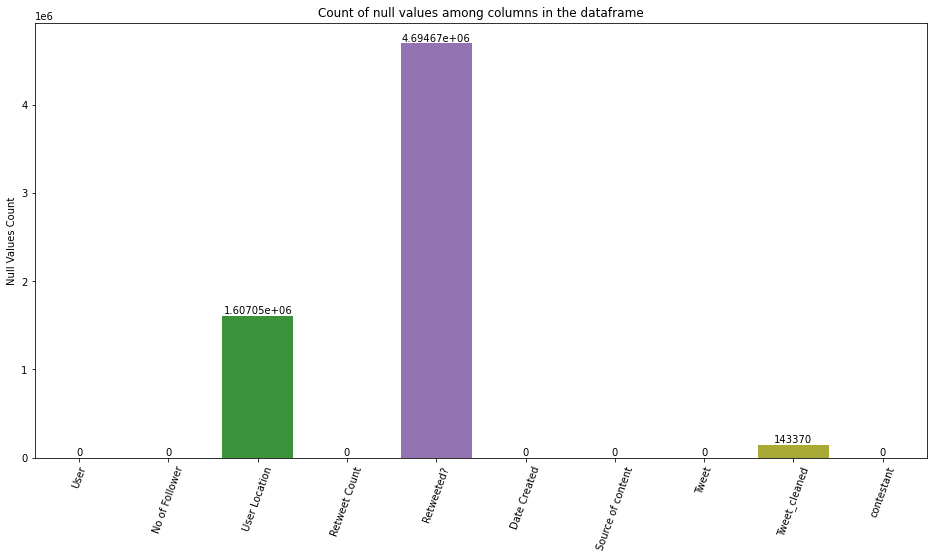

In [13]:
plt.figure(figsize=(16,8))
ax=sns.barplot(df.isna().sum().index,df.isna().sum().values)

plt.ylabel('Null Values Count')
plt.title('Count of null values among columns in the dataframe')
plt.xticks(rotation=70);
for i in ax.containers:
    ax.bar_label(i,)

#### The Retweeted column was the column which showed if any of the data was a retweet it showed that most of the data wasn't. The user locations data had about 1.6 million empty data which was about 1/3 of the to tal dataset. The tweet cleaned column had some null values as some of the text in the tweet columns were just @Username and a http link and those were removed.

In [14]:
df["User Location"].fillna(" ", inplace=True)

In [15]:
#Extract states from user location column
df["state"]=df["User Location"].apply(lambda s : match_state(input_string=s,string_list=locations))

In [16]:
#Create a state dataframe so as to split combined states into columns
pd.set_option("display.max_rows", 120)
state_df=pd.DataFrame(df.state.values.tolist()).add_prefix('state_')

In [17]:
#Concatenate state data with dataframe and delete state dataframe to conserve space
df=pd.concat([df,state_df],axis=1)

In [18]:
gc.collect()

63

In [19]:
df.drop(columns=['state','state_1','state_2','state_3','state_4','Retweeted?'], inplace=True)

In [20]:
del state_df

In [21]:
gc.collect()

63

In [22]:
df.rename(columns={'state_0':'state'}, inplace=True)

In [23]:
#Replace state data which are sets of loctations with states in Nigeria
df['state'].replace(['sapele','ughelli','warri','asaba','agbor','amai'],"delta",inplace=True)
df['state'].replace(['auchi','benin-city','benin'],"edo",inplace=True)
df['state'].replace(['umuahia','uzuakoli'],"abia",inplace=True)
df['state'].replace(['portharcourt','isiokpo','phc','abua','ph','harcourt'],"rivers",inplace=True)
df['state'].replace(['badagry','ikeja','ibeju','ikorodu','victoria','ikoyi','lekki','ojo',
                     'ijede','epe','igando','ikoton','lasgidi','iyagbe','ketu','oko-eko','eko','isolo'
                     ,'gidi','ogogoro','agbaye','surulere','bonny','ajegunle'],"lagos",inplace=True)
df['state'].replace(["calabar",'cross'],"cross river",inplace=True)
df['state'].replace(['uyo','ibom','ikot'],"akwa ibom",inplace=True)
df['state'].replace(['owerre','owerri'],"imo",inplace=True)
df['state'].replace(['ijebu','abeokuta','ofada','itele','ibafo','otta','ota','shagamu','sagamu','aiyetoro','agbara','iperu'],"ogun",inplace=True)
df['state'].replace(['minna','suleja','bida'],'niger',inplace=True)
df['state'].replace('maiduguri','borno',inplace=True)
df['state'].replace(['ibadan','ibada','ogbomosho'],'oyo',inplace=True)
df['state'].replace(['mpape','federal','fct','uwa','asokoro','garki','gawu','maitama','maitama','mararaba'],'abuja',inplace=True)
df['state'].replace('gusau','zamfara',inplace=True)
df['state'].replace('aba','abia',inplace=True)
df['state'].replace('jos','plateau',inplace=True)
df['state'].replace(['lokoja','ejule'],'kogi',inplace=True)
df['state'].replace(['nassarawa','lafia','keffi','karu','umaisha'],'nasarawa',inplace=True)
df['state'].replace(['jalingo','wukari'],'taraba',inplace=True)
df['state'].replace(['akure','owo','ikare'],'ondo',inplace=True)
df['state'].replace(['otukpo','makurdi','okpokwu'],'benue',inplace=True)
df['state'].replace(['awka','onitsha','ofia','nnewi'],'anambra',inplace=True)
df['state'].replace('ilorin','kwara',inplace=True)
df['state'].replace('yenagoa','bayelsa',inplace=True)
df['state'].replace('nsukka','enugu',inplace=True)
df['state'].replace(['geidam','damaturu'],'yobe',inplace=True)
df['state'].replace(['dutse','kafin'],'jigawa',inplace=True)
df['state'].replace(['abakiliki','afikpo'],'ebonyi',inplace=True)
df['state'].replace(['osogbo','ife','erin-odo','oshogbo'],'osun',inplace=True)
df['state'].replace('agbado','ekiti',inplace=True)
df['state'].replace('zaria','kaduna',inplace=True)
df['state'].replace('gaya','kano',inplace=True)
df['state'].replace('yola','adamawa',inplace=True)
df['state'].replace('edmonton',' ',inplace=True)
df['state'].fillna(" ",inplace=True)
gc.collect()

0

In [24]:
#Capitalize states text
df['state']=df['state'].str.title()

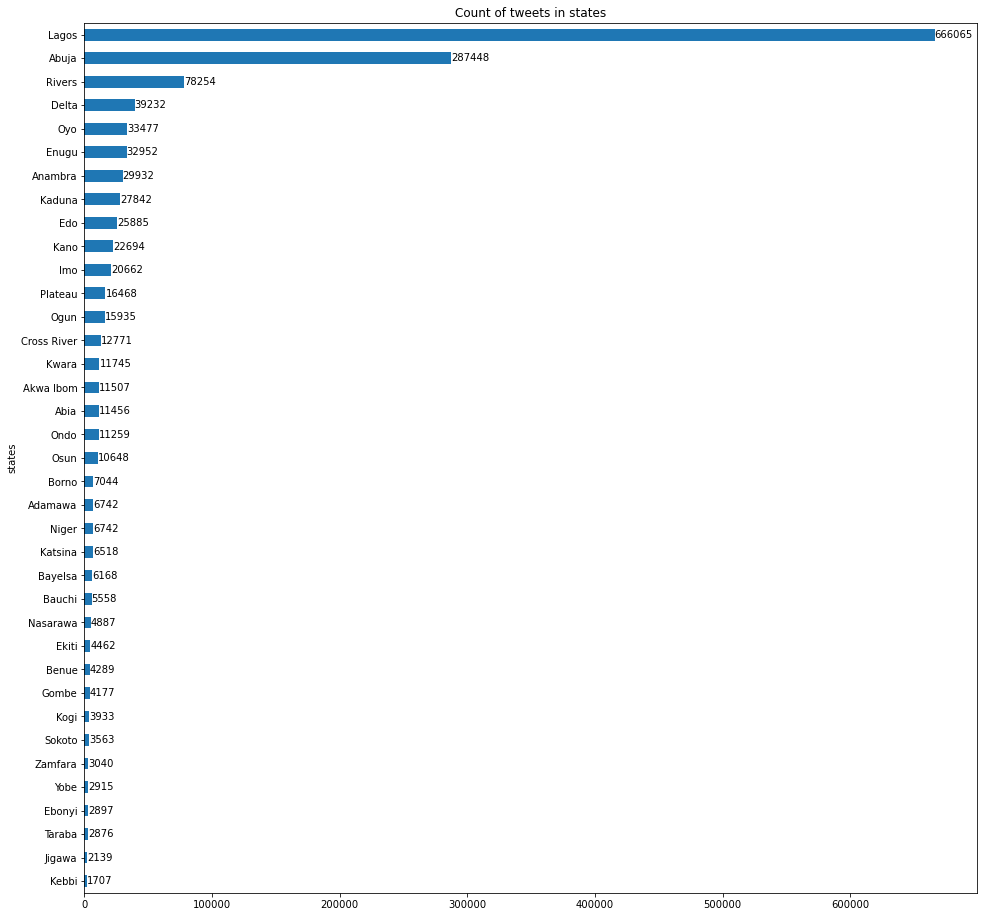

In [25]:
plt.figure(figsize=(16,16))
ax=df[df['state']!=' ']['state'].value_counts().sort_values(ascending=True).plot(kind='barh');
plt.ylabel('states')
plt.title('Count of tweets in states')
for i in ax.containers:
    ax.bar_label(i,)

In [26]:
print('count of confirmed states in data set = ', len(df[df['state']!=' ']['state']))

count of confirmed states in data set =  1445889


#### Of about 3.2 million values in user location, 1.4 million confirmed state values could be extracted and about half of the tweets from confirmed states came from lagos with a value of over 650,000 

In [27]:
def match_state(input_string,string_list):
    words=re.findall(r"\w+", input_string)
    lists=[word for word in words if word in string_list]
    return lists

In [28]:
# Match user locations and locations in Nigeria only
df["country"]=df["User Location"].apply(lambda s : match_state(input_string=s,string_list=locations + ['nigeria','ng','naija','biafra','tinubu','obi']))

In [29]:
pd.set_option("display.max_rows", 120)
country_df=pd.DataFrame(df.country.values.tolist()).add_prefix('country_')

In [30]:
df=pd.concat([df,country_df],axis=1)

In [31]:
del country_df
gc.collect()

63

In [32]:
df.drop(columns=['country','country_1','country_2','country_3','country_4'], inplace=True)

In [33]:
df.rename(columns={'country_0':'country'}, inplace=True)

In [34]:
df['country'].replace(to_replace=locations + ['nigeria','ng','naija','biafra','tinubu','obi'],value="Nigeria",inplace=True)

In [35]:
df["country"].value_counts()

Nigeria    2045651
Name: country, dtype: int64

#### In as much as tweets from other locations were in the data, the focus was just on tweets from Nigeria. The confirmed tweet from Nigeria by states and user locations amounted to about 2 million. Mind you, about 1.6 million empty data existed in the user locations data and some locations could not be added as it didn't include the search parameters and it couldnt be pinpointed on the basis of local government and states

In [36]:
df.drop(columns='User Location',inplace=True)
gc.collect()

105

In [37]:
df.dropna(subset=['Tweet_cleaned'],inplace=True)

In [38]:
def match_contestants(input_string,string_list):
    contestants=[]
    words=re.findall(r"\w+", input_string)
    lists=[word for word in words if word in string_list]
    string=" ".join(lists)
    for word in string.split(" "):
        if word in contestants:
            pass
        else:
            contestants.append(word)
    return " ".join(contestants)


In [39]:
df["combo_contestant"]=df["Tweet_cleaned"].apply(lambda s : match_contestants(input_string=s,string_list=['obi','tinubu','atiku']))

In [40]:

df["combo_contestant"].replace("tinubu atiku","atiku tinubu",inplace=True)
df["combo_contestant"].replace("tinubu obi","obi tinubu",inplace=True)
df["combo_contestant"].replace("obi atiku","atiku obi",inplace=True)
df["combo_contestant"].replace(["tinubu obi atiku","obi tinubu atiku","tinubu atiku obi","atiku tinubu obi","obi atiku tinubu"],"atiku obi tinubu",inplace=True)

In [41]:
df['combo_contestant'].replace("",np.nan,inplace=True)

In [42]:
df['combo_contestant'].fillna(df['contestant'],inplace=True)

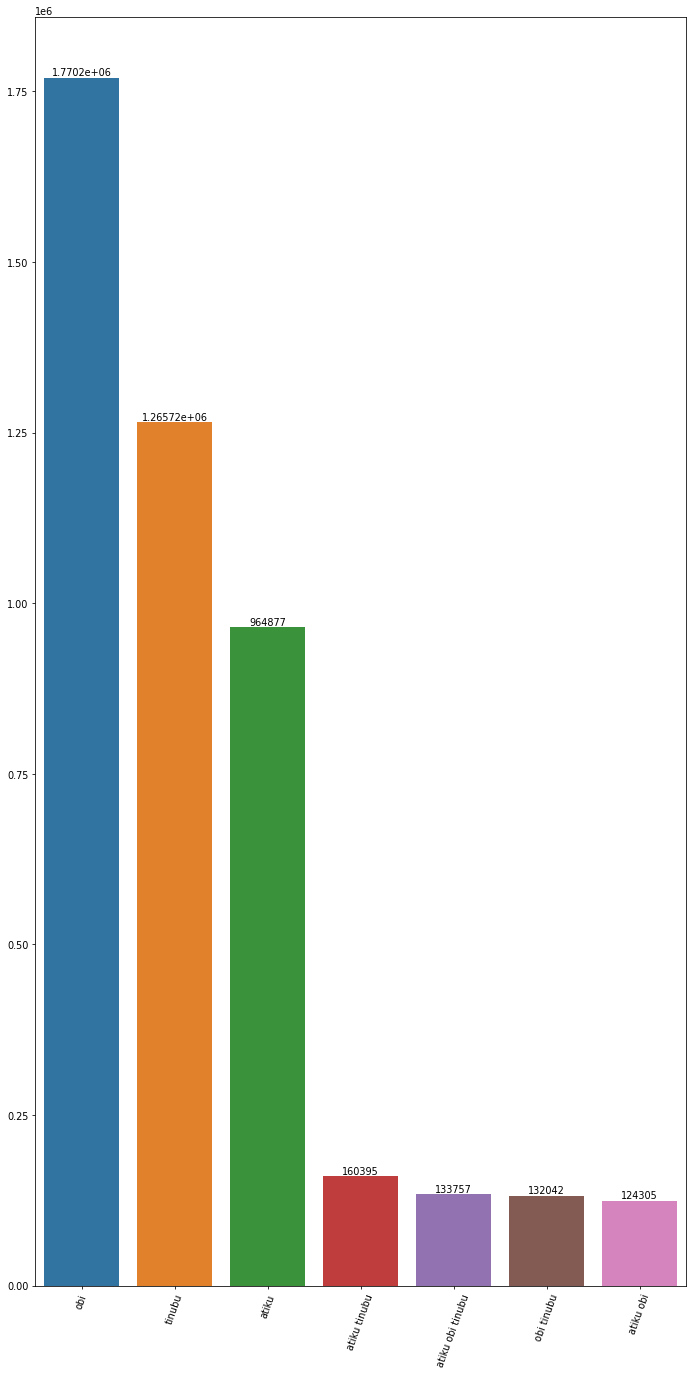

In [43]:
plt.figure(figsize=[12,24], dpi=70)
ax=sns.barplot(x=df["combo_contestant"].value_counts().sort_values(ascending=False).index,
              y=df["combo_contestant"].value_counts().sort_values(ascending=False).values)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=70)
plt.show()

#### The search paramenter used to get the tweets were the names of the presidential candidates in the tweets. In most conversations about politics they tend to be comparisms between a candidate and another and that lead to calling some two or more candidates names in a single tweet. Furthermore, in argument, there is always this part of the conversation which involves 'you should be happy to be called in the same sentence with the other person'. To this effect, the analysis above was conducted to determine which candidates were mentioned together. The analysis showed that after each candidates were mentioned individually, atiku and tinubu together was metioned more in combination in the tweets. This may be due to the fact that one wanted to disqualify the others participation in the election. Next was atiku obi and tinibu followed by obi and tinubu which could be due to the fact that both were being compared a lot by achievements. The last was atiku and obi. In as much as there were combinations of candidate in a single tweet, there is no reason to believe that it would affect the sentiment analysis as the number of text with the combinations are too small to consitute an issue

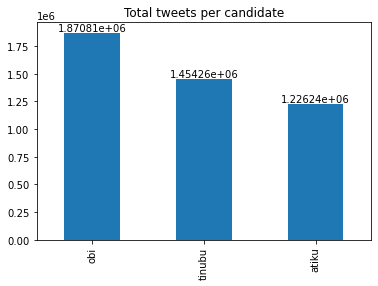

In [44]:
ax=df['contestant'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,)
    plt.title('Total tweets per candidate')
plt.show()

#### A specific date range was used which was between 30th October 2022 to 30th January 2023. In as much as this date range was used, some candidates had more tweets than others with obi tweets amounting to about 1.8 million tweets which was more than 1/3 of the total tweets. Tinubu tweets were the second highest with about 1.4 million and Atiku tweets were the lowest with about 1.2 million tweets

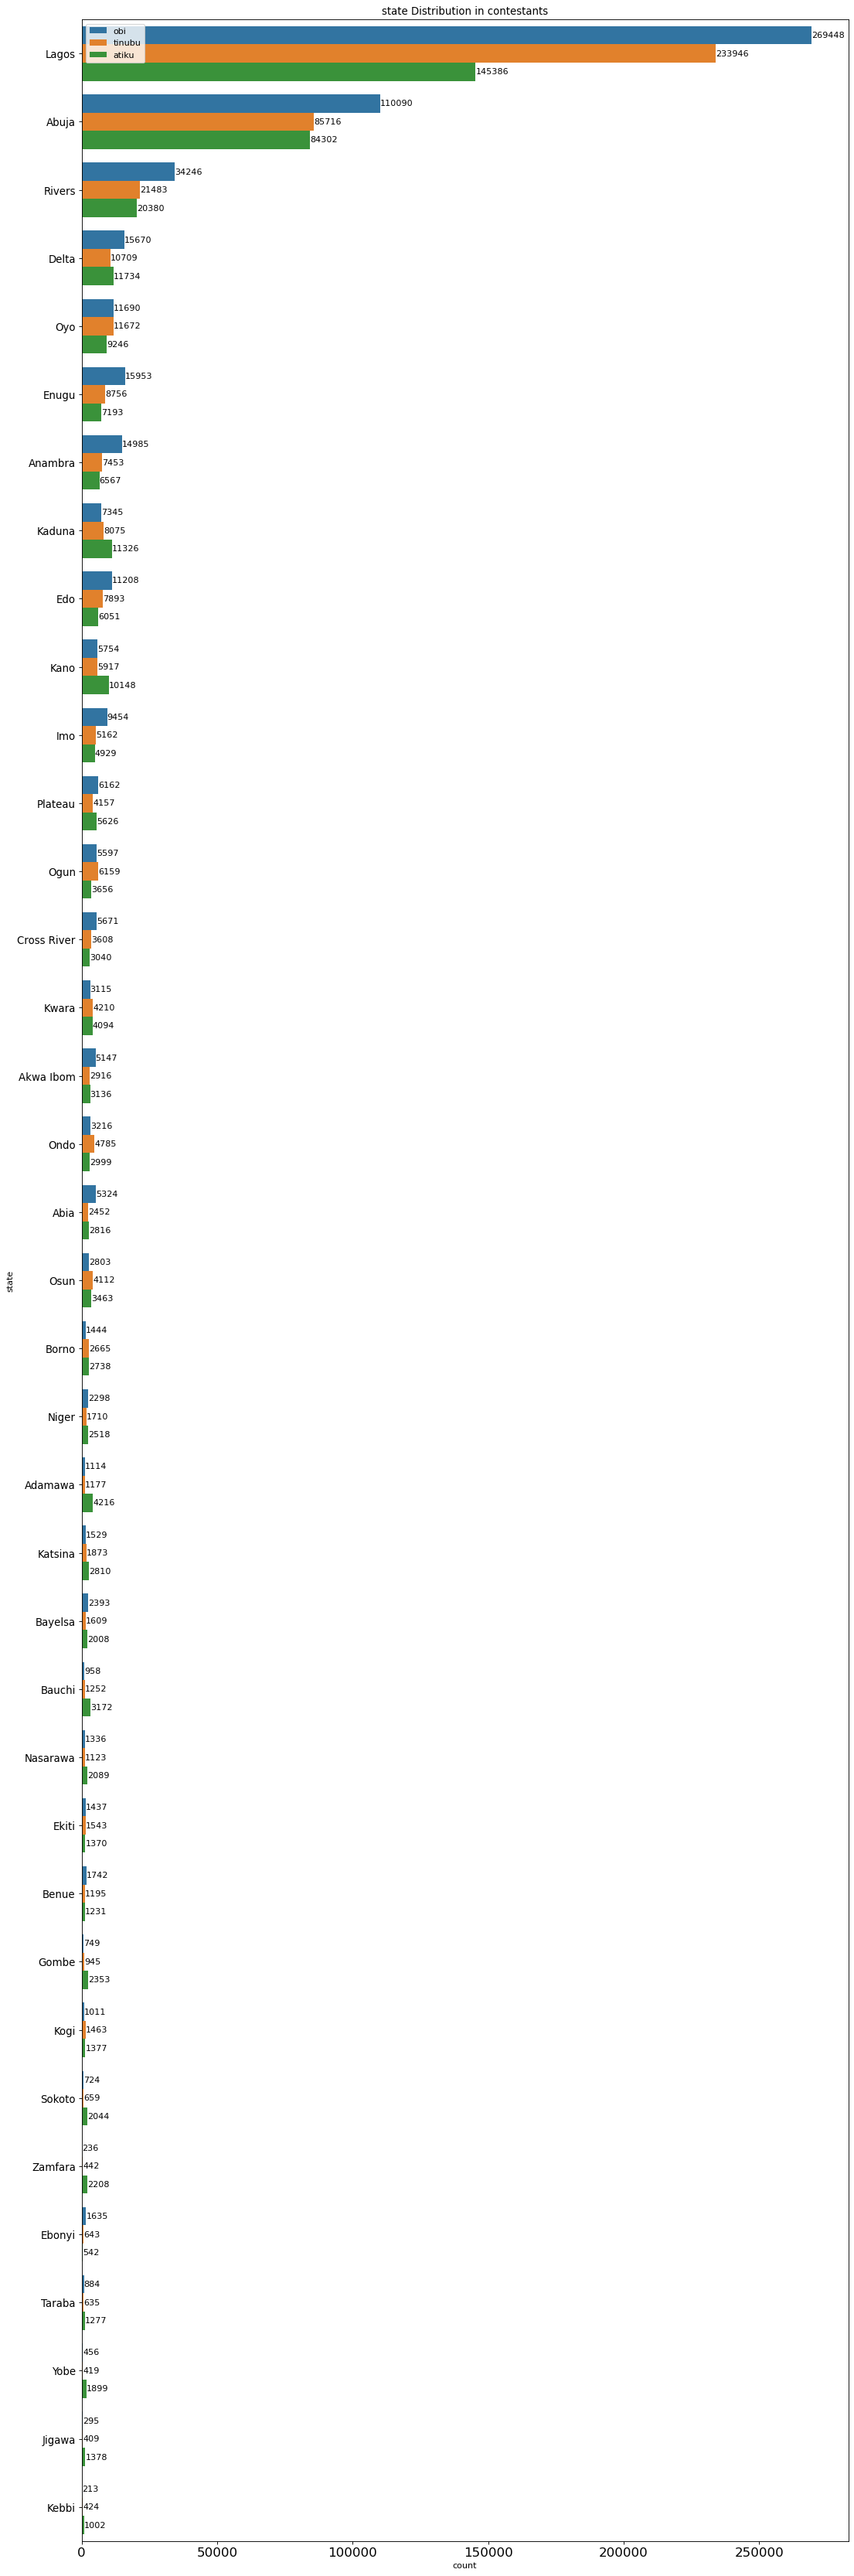

In [45]:
#Getting number of tweets by states
df['state_count'] = df[df['state']!=" "].groupby('state')['contestant'].transform('count')

fig = plt.figure(figsize=(16, 54), dpi=80)

ax=sns.countplot(y=df[df['state']!=" "].sort_values(by='state_count', ascending=False)['state'],
              hue=df[df['state']!=" "].sort_values(by='state_count', ascending=False)['contestant'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=2)
plt.title('state Distribution in contestants')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


#### Tweets for candidates by states was also analysed and it showed that most tweets from the north with the exception of some north central states were atiku based tweets. Most of the tweets from Lagos were Obi based tweets but this may be due to the fact that obi tweets were higher than the rest. Obi based tweets were also higher in south east and south south states. Tinubu based tweets were higher in south west regions of Nigeria and some North central states like Kwara states

In [46]:
df.drop(columns=['state_count'],inplace=True)

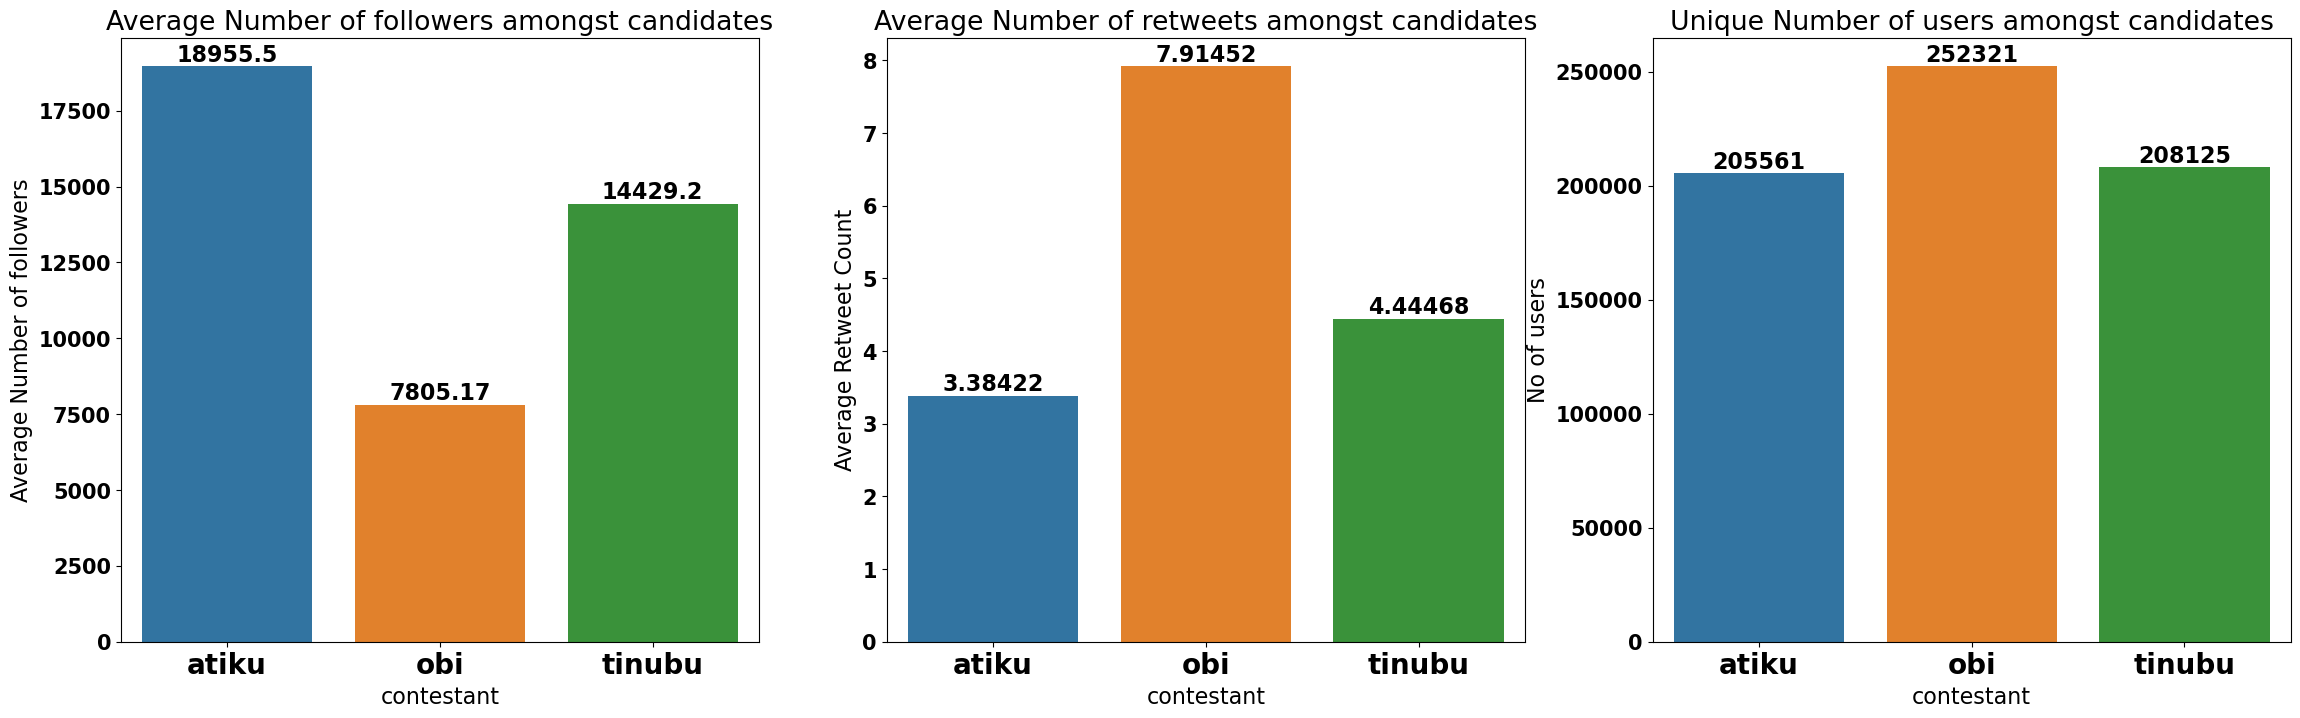

In [47]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=15)
font={
    'family': 'nor',
    'weight':'bold',
    'size': 16
}
matplotlib.rc('font', **font)
fig, axes = plt.subplots(ncols=3,nrows=1, figsize=(28, 8), dpi=100)
ax1=sns.barplot(x=df.groupby('contestant')['No of Follower'].mean().index,y=df.groupby('contestant')['No of Follower'].mean(), ax=axes[0])
ax2=sns.barplot(x=df.groupby('contestant')['Retweet Count'].mean().index,y=df.groupby('contestant')['Retweet Count'].mean(),ax=axes[1])
ax3=sns.barplot(x=df.groupby('contestant').User.nunique().index,y=df.groupby('contestant').User.nunique(),ax=axes[2])
for i in ax1.containers:
    ax1.bar_label(i,)
for i in ax2.containers:
    ax2.bar_label(i,)
for i in ax3.containers:
    ax3.bar_label(i,) 
ax3.set(ylabel='No of users')
ax2.set(ylabel='Average Retweet Count')
ax1.set(ylabel='Average Number of followers')
ax1.set(title='Average Number of followers amongst candidates')
ax2.set(title='Average Number of retweets amongst candidates')
ax3.set(title='Unique Number of users amongst candidates')
plt.show()

#### Obi tweet participants had the lowest average number of followers, but were the largest set of users and had the highest average number of retweets. This could mean that although their followers were not as much as the other two, their message must have reached a lot of people across the twitter user 'board'. Atiku tweet participants on the other hand had the highest average number of followers but the lowest number of unique users and average number of retweets.This may mean that even if the users don't travel fast by sheer will of retweeting, the number of followers reduces the gap in message movement. Tinubu lies in the middle of basically all the parameters

In [48]:
df.drop(columns=['No of Follower','Retweet Count','User'],inplace=True)
gc.collect()

14840

In [49]:
# def geoloc(loc):
    
#     geolocator = Nominatim(user_agent='MyApp')
#     location = geolocator.geocode(loc)
#     latitude=location.latitude
#     longitude=location.longitude
#     return [latitude,longitude]

In [50]:
# geoloc('Abia')

#### geoloc was to be used to get the latitude and longitude data but on saving the data, it had server side issues and had to be commented to avoid it as the notebook would run for about 10 hours and an error in the geoloc portion would constitute a nuisance. The map data was done instead on tableau and can be viewed with the link below 

In [51]:
top_source=df['Source of content'].value_counts()
x=top_source[:10].index.to_list()
top_source_list=('|').join(x)

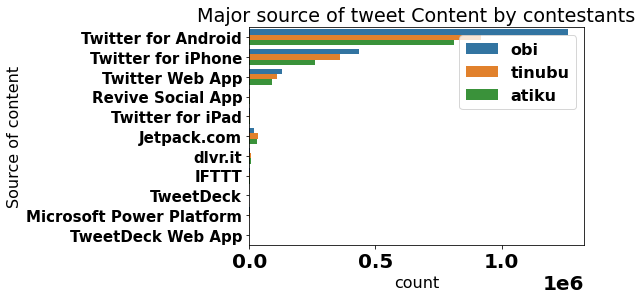

In [52]:
sns.countplot(y='Source of content', hue='contestant',data=df[df['Source of content'].str.contains(top_source_list)])
plt.legend(loc='upper right');
plt.title('Major source of tweet Content by contestants');

#### The top sources of tweets from each candidate was from Android phones, then Iphones and twitter web app. There were data other sources but just the top ten were considered. A source known as jetpack.com had more Tinubu tweets, than Atiku and Obi tweets

In [53]:
del top_source ,x 
gc.collect()

5122

In [54]:
del df['Source of content']

In [55]:
df

Date Created  \
0        2023-01-29 23:59:34+00:00   
1        2023-01-29 23:59:27+00:00   
2        2023-01-29 23:59:26+00:00   
3        2023-01-29 23:59:10+00:00   
4        2023-01-29 23:58:56+00:00   
...                            ...   
4694667  2022-10-07 21:33:04+00:00   
4694668  2022-10-07 21:32:45+00:00   
4694669  2022-10-07 21:32:40+00:00   
4694670  2022-10-07 21:32:30+00:00   
4694671  2022-10-07 21:32:20+00:00   

                                                     Tweet  \
0        Did you know that Peter Obi lived with the cur...   
1        @Ohiss_ @PeterObi He will, by God's Grace. But...   
2        @Indigo51603150 @okesigo_ @solakafinta @PeterO...   
3        @ketoolarewaju1 @solakafinta @PeterObi @Jack_n...   
4        It seems the best content for some people now ...   
...                                                    ...   
4694667  2023, we’ve all agreed to retire Tinubu and At...   
4694668  @renoomokri You are running away from Nigeria ...   
4694669   @icee_queeen @fkeyamo No it was Atiku fine girl.   
4694670  Wish I don't have to say this about Atiku/Tinu...   
4694671  Court fixes date on Suit seeking to Disqualify...   

                                             Tweet_cleaned contestant  state  \
0        know peter obi lived current sultan sokoto stu...        obi          
1        god's grace well also nigerian presume tweetin...        obi          
2        opening dirty mouth..what done opening mouth s...        obi  Lagos   
3                                                      get        obi   Kano   
4        seems best content people ethnic bigotry even ...        obi          
...                                                    ...        ...    ...   
4694667            agreed retire tinubu atiku may god help      atiku          
4694668  running away nigeria since almost reason suppo...      atiku          
4694669                                    atiku fine girl      atiku          
4694670  wish say atiku/tinubu future nigeria must get ...      atiku          
4694671  court fix date suit seeking disqualify atiku t...      atiku  Delta   

         country combo_contestant  
0           None              obi  
1           None              obi  
2        Nigeria              obi  
3        Nigeria              obi  
4           None              obi  
...          ...              ...  
4694667     None     atiku tinubu  
4694668     None            atiku  
4694669     None            atiku  
4694670  Nigeria     atiku tinubu  
4694671  Nigeria     atiku tinubu  

[4551302 rows x 7 columns]

In [56]:
states=df[df['state']!=" "]['state'].value_counts().index.to_list()
states

['Lagos',
 'Abuja',
 'Rivers',
 'Delta',
 'Oyo',
 'Enugu',
 'Anambra',
 'Kaduna',
 'Edo',
 'Kano',
 'Imo',
 'Plateau',
 'Ogun',
 'Cross River',
 'Kwara',
 'Akwa Ibom',
 'Ondo',
 'Abia',
 'Osun',
 'Borno',
 'Niger',
 'Adamawa',
 'Katsina',
 'Bayelsa',
 'Bauchi',
 'Nasarawa',
 'Ekiti',
 'Benue',
 'Gombe',
 'Kogi',
 'Sokoto',
 'Zamfara',
 'Ebonyi',
 'Taraba',
 'Yobe',
 'Jigawa',
 'Kebbi']

#### For geoloc as using it directly on the data was taking a lot of time so latitude and longitude of each state was placed in a dictionary, converted to a dataframe and joined to the original dataframe on states


In [57]:
# state_dict={}
# for state in states:
#     state_dict[state]=geoloc(state)
# del states

In [58]:
# geoloc('Niger State')

In [59]:
# latitude_df=pd.DataFrame(state_dict)
# latitude_df.to_csv('latitude.csv')
# latitude_df=pd.read_csv('latitude.csv',header=None)
# latitude_df=latitude_df.transpose()

In [60]:
# latitude_df.dropna(inplace=True)

In [61]:
# latitude_df
# latitude_df.iloc[3][[1,2]]=5.5442301,5.7602691
# latitude_df.iloc[15][[1,2]]=4.929987,7.872162
# latitude_df.iloc[19][[1,2]]=11.8333333,13.149999
# latitude_df.iloc[20][[1,2]]=9.931076,5.598347


In [62]:
# latitude_df

In [63]:
# latitude_df.rename(columns={0:'state',1:'latitude',2:'longitude'}, inplace=True)

In [64]:
# df=df.join(latitude_df.set_index('state'), on='state', how='left')

In [65]:
# del latitude_df

In [66]:
# del state_dict
# gc.collect()

In [67]:
# import descartes
# import geopandas as gpd
# from shapely.geometry import Point, Polygon

In [68]:
# gpdf=gpd.read_file('merged_df.csv')

In [69]:
# gpdf

In [70]:
crs= {'init':'epsg:4326'}

In [71]:
df.shape

(4551302, 7)

In [72]:
gc.collect()

373

# Ngrams and sentiment analysis

In [73]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100
obi_tweets = df['contestant'] == 'obi'
atiku_tweets = df['contestant'] == 'atiku'
tinubu_tweets = df['contestant'] == 'tinubu'

# Unigrams
obi_unigrams = defaultdict(int)
atiku_unigrams = defaultdict(int)
tinubu_unigrams=defaultdict(int)
for tweet in df[obi_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet):
        obi_unigrams[word] += 1
        
for tweet in df[atiku_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet):
        atiku_unigrams[word] += 1

for tweet in df[tinubu_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet):
        tinubu_unigrams[word] += 1

obi_unigrams = pd.DataFrame(sorted(obi_unigrams.items(), key=lambda x: x[1])[::-1])
atiku_unigrams = pd.DataFrame(sorted(atiku_unigrams.items(), key=lambda x: x[1])[::-1])
tinubu_unigrams = pd.DataFrame(sorted(tinubu_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
obi_bigrams = defaultdict(int)
atiku_bigrams = defaultdict(int)
tinubu_bigrams=defaultdict(int)

for tweet in df[obi_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=2):
        obi_bigrams[word] += 1
        
for tweet in df[atiku_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=2):
        atiku_bigrams[word] += 1
        
for tweet in df[tinubu_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=2):
        tinubu_bigrams[word] += 1
        
obi_bigrams = pd.DataFrame(sorted(obi_bigrams.items(), key=lambda x: x[1])[::-1])
atiku_bigrams = pd.DataFrame(sorted(atiku_bigrams.items(), key=lambda x: x[1])[::-1])
tinubu_bigrams = pd.DataFrame(sorted(tinubu_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
obi_trigrams = defaultdict(int)
atiku_trigrams = defaultdict(int)
tinubu_trigrams=defaultdict(int)

for tweet in df[obi_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=3):
        obi_trigrams[word] += 1
        
for tweet in df[atiku_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=3):
        atiku_trigrams[word] += 1
        
for tweet in df[tinubu_tweets]['Tweet_cleaned']:
    for word in generate_ngrams(tweet, n_gram=3):
        tinubu_trigrams[word] += 1
        
obi_trigrams = pd.DataFrame(sorted(obi_trigrams.items(), key=lambda x: x[1])[::-1])
atiku_trigrams = pd.DataFrame(sorted(atiku_trigrams.items(), key=lambda x: x[1])[::-1])
tinubu_trigrams = pd.DataFrame(sorted(tinubu_trigrams.items(), key=lambda x: x[1])[::-1])

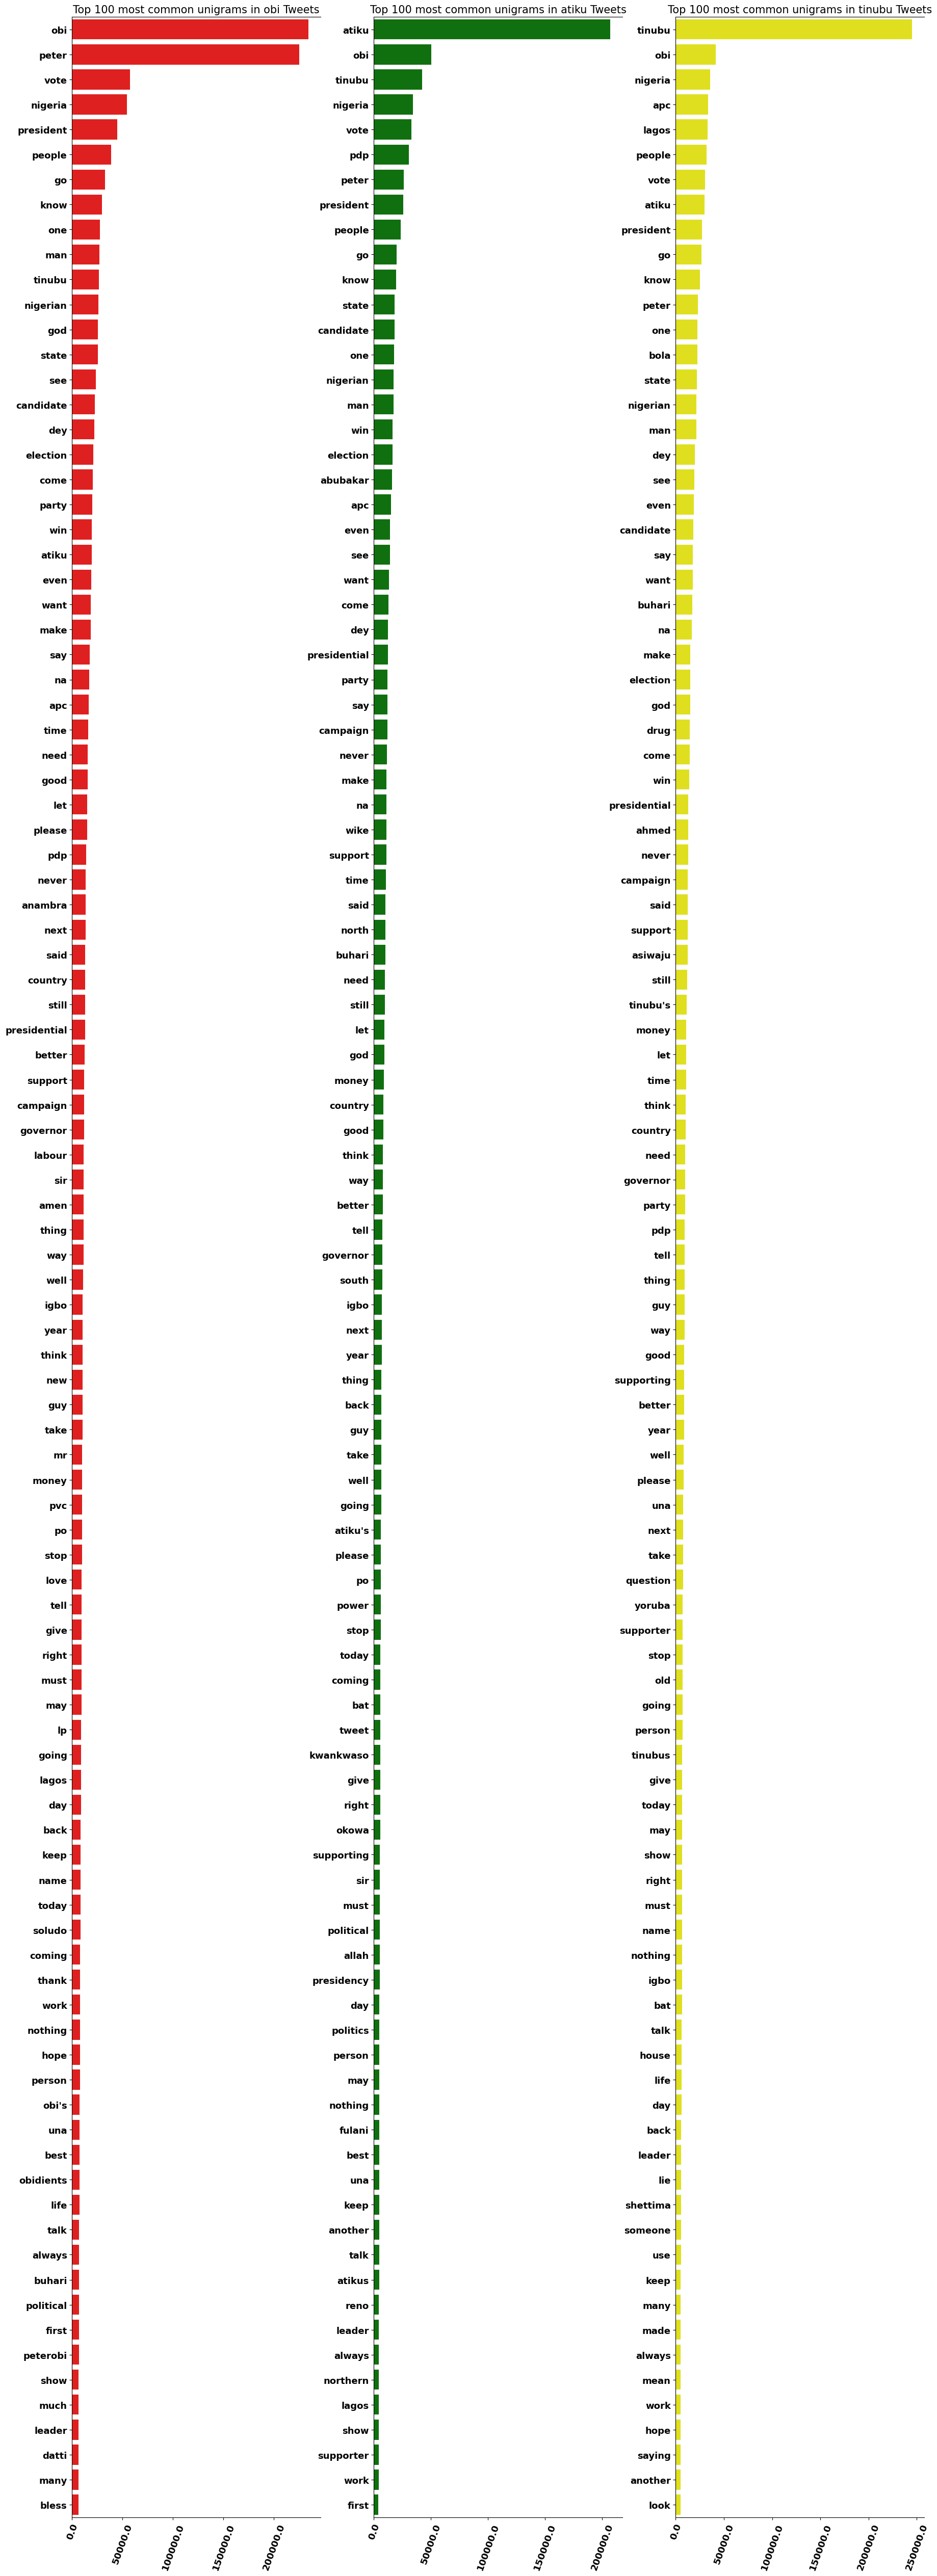

In [74]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 50), dpi=100)
plt.tight_layout()
sns.barplot(y=obi_unigrams[0].values[:N], x=obi_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=atiku_unigrams[0].values[:N], x=atiku_unigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=tinubu_unigrams[0].values[:N], x=tinubu_unigrams[1].values[:N], ax=axes[2], color='yellow')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)
    axes[i].set_xticklabels(ax.get_xticks(),rotation=70)

axes[0].set_title(f'Top {N} most common unigrams in obi Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in atiku Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common unigrams in tinubu Tweets', fontsize=15)


plt.show()

#### As expected, the major words in each candidates tweets was their names and elections, president, vote and a lot of political jargons

In [75]:
del atiku_unigrams, obi_unigrams, tinubu_unigrams

In [76]:
gc.collect()

82

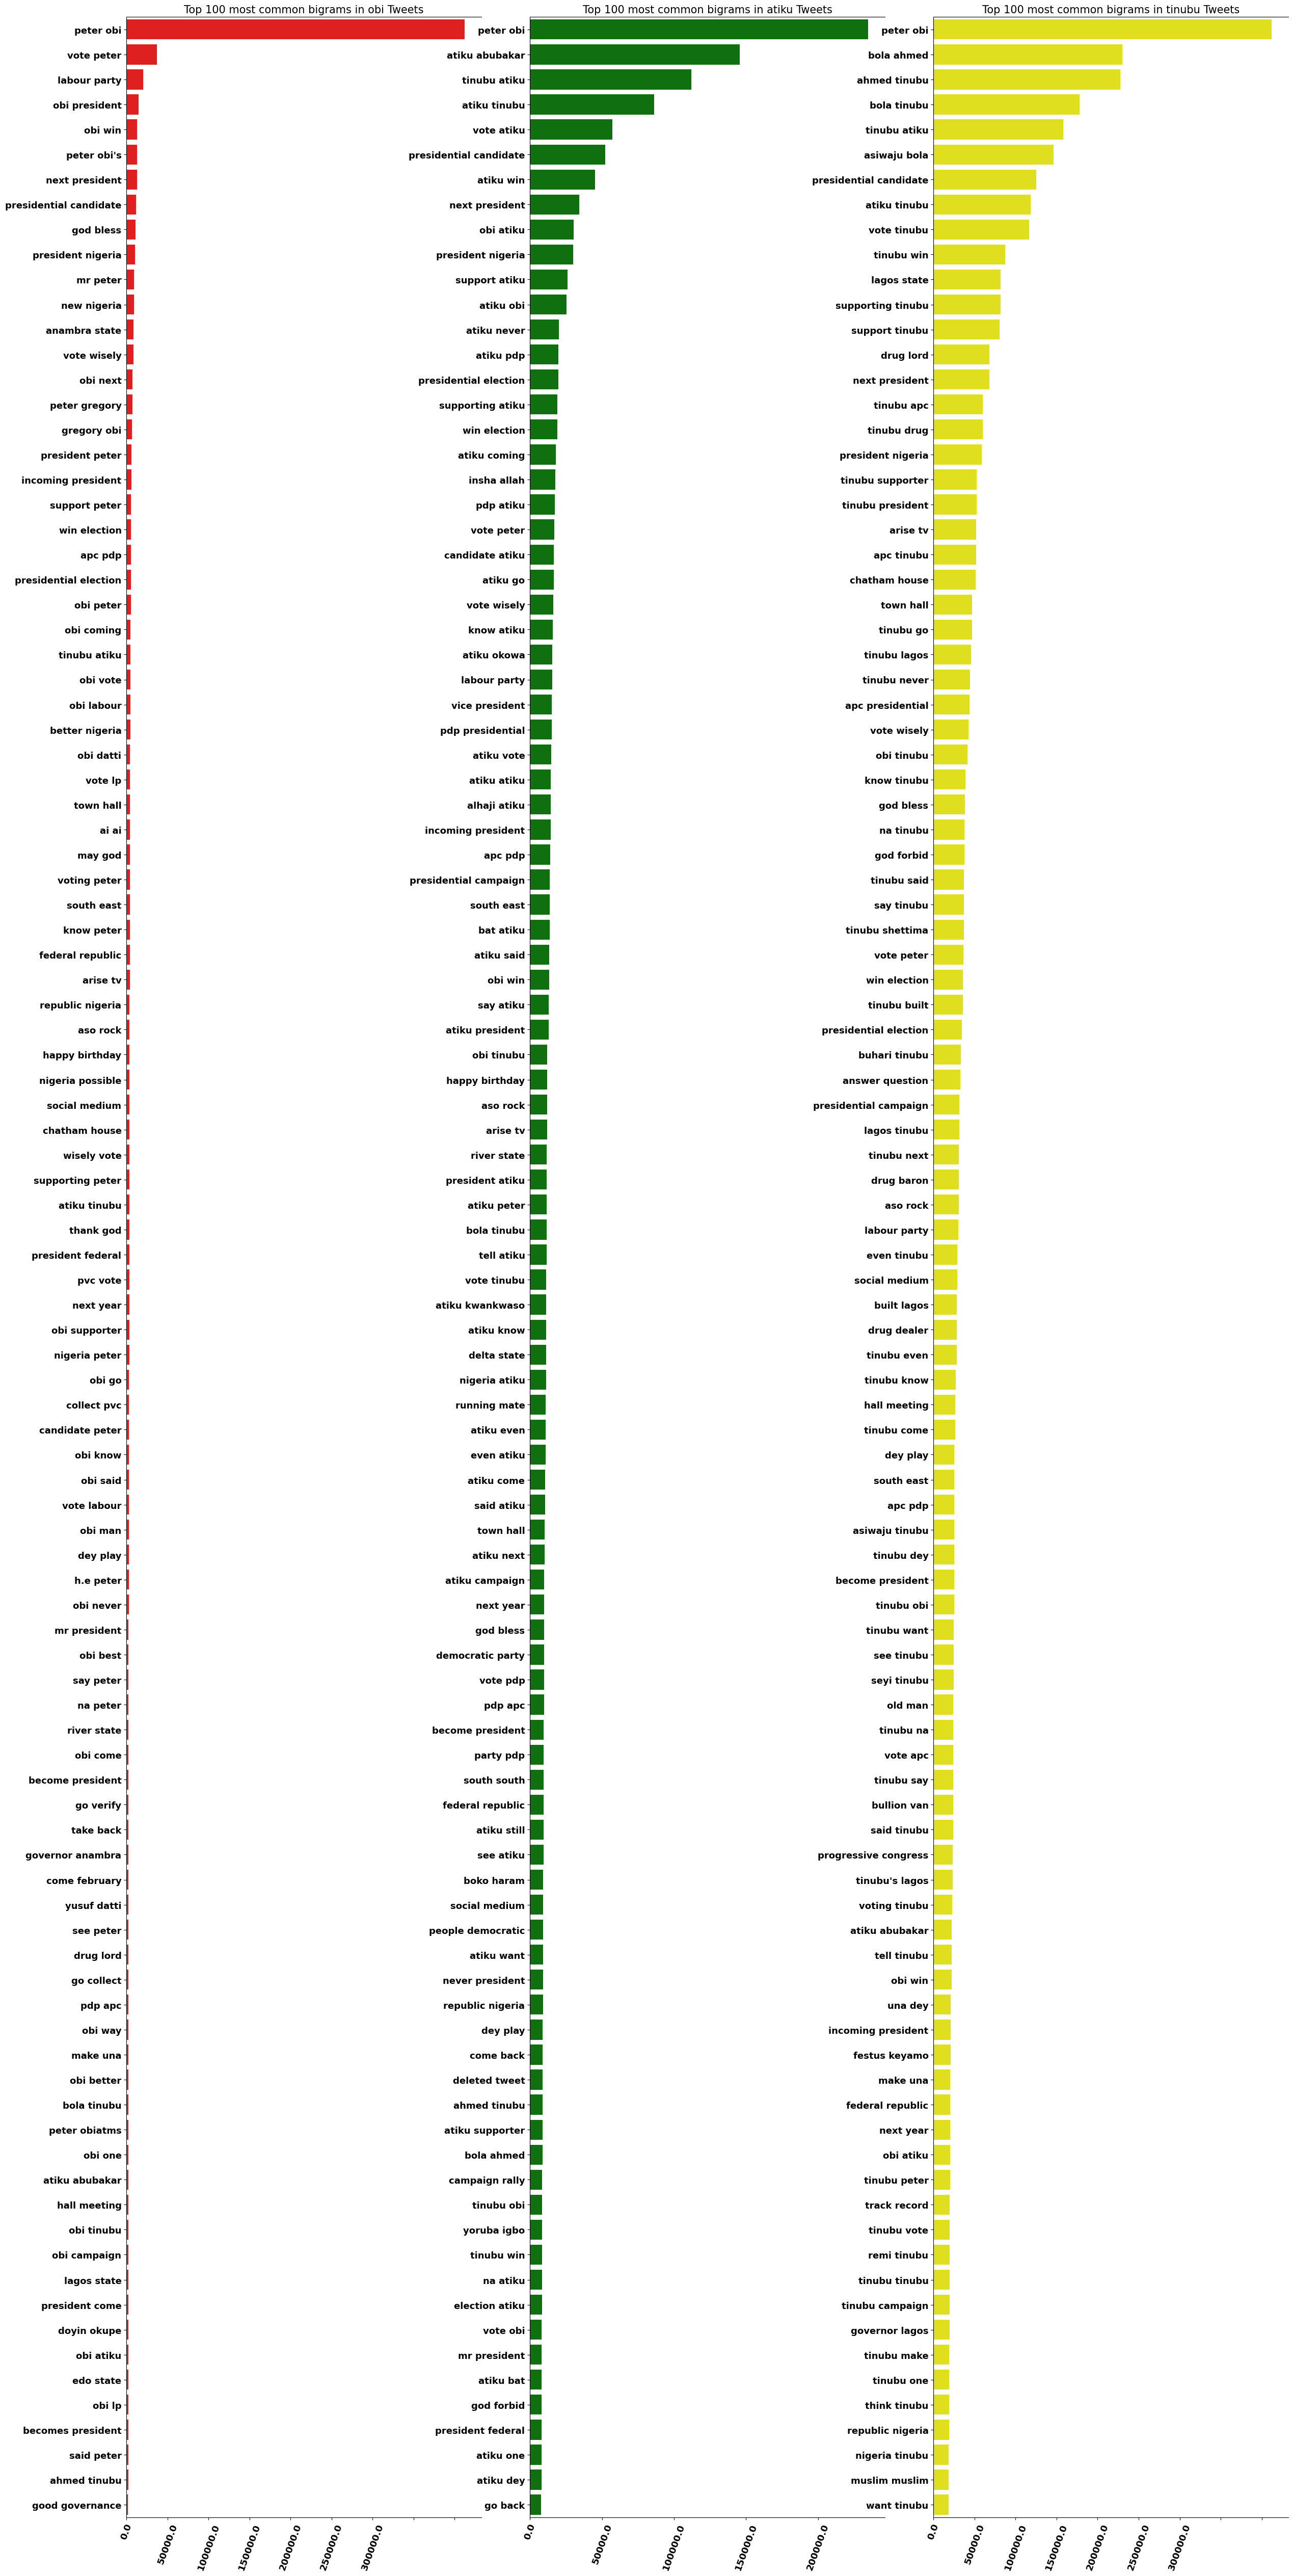

In [77]:
fig, axes = plt.subplots(ncols=3, figsize=(24, 50), dpi=100)
plt.tight_layout()
sns.barplot(y=obi_bigrams[0].values[:N], x=obi_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=atiku_bigrams[0].values[:N], x=atiku_bigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=tinubu_bigrams[0].values[:N], x=tinubu_bigrams[1].values[:N], ax=axes[2], color='yellow')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)
    axes[i].set_xticklabels(ax.get_xticks(),rotation=70)

axes[0].set_title(f'Top {N} most common bigrams in obi Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in atiku Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common bigrams in tinubu Tweets', fontsize=15)


plt.show()

#### Surprisingly, most of the double words in atiku tweets and tinubu tweets were of Peter Obi. Details of the double words in the data above

In [78]:
del atiku_bigrams, obi_bigrams, tinubu_bigrams
gc.collect()

68096

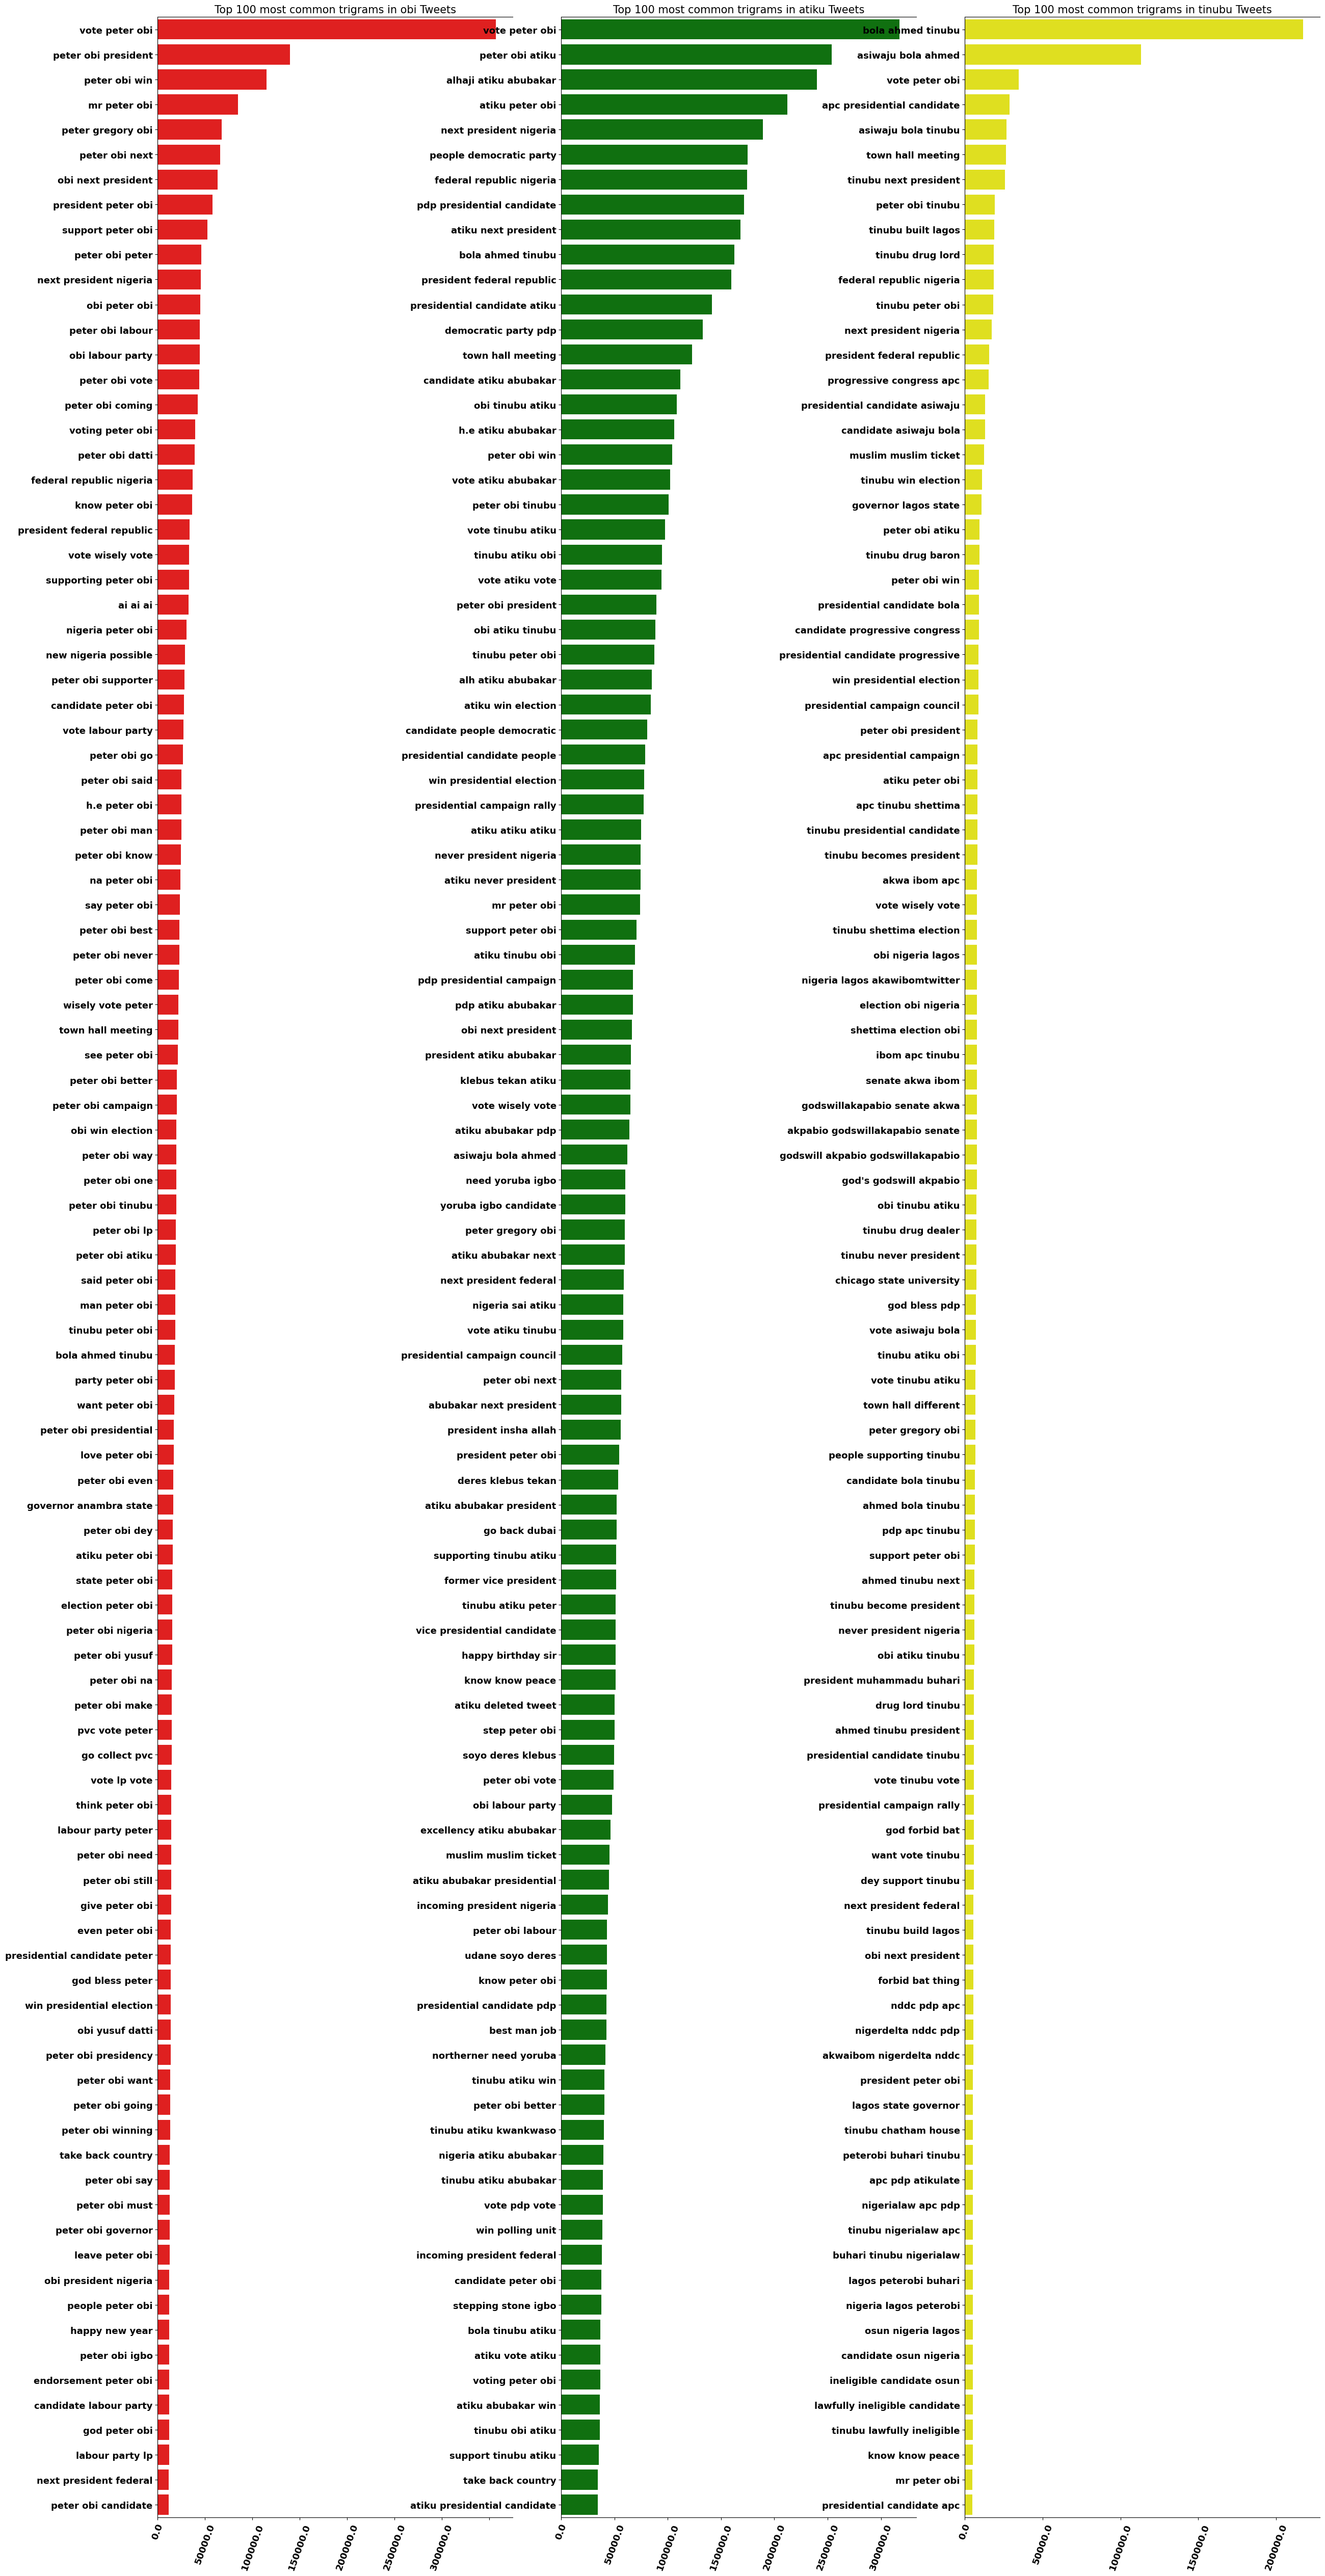

In [79]:
fig, axes = plt.subplots(ncols=3, figsize=(24, 50), dpi=100)
plt.tight_layout()
sns.barplot(y=obi_trigrams[0].values[:N], x=obi_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=atiku_trigrams[0].values[:N], x=atiku_trigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=tinubu_trigrams[0].values[:N], x=tinubu_trigrams[1].values[:N], ax=axes[2], color='yellow')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)
    axes[i].set_xticklabels(ax.get_xticks(),rotation=70)

axes[0].set_title(f'Top {N} most common trigrams in obi Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in atiku Tweets', fontsize=15)
axes[2].set_title(f'Top {N} most common trigrams in tinubu Tweets', fontsize=15)


plt.show()

In [80]:
del atiku_trigrams, obi_trigrams, tinubu_trigrams

In [81]:
obi_words= []

for tweet in df[obi_tweets]['Tweet_cleaned']:
    obi_words.append(tweet)
obi_words=' '.join(obi_words)


In [82]:
len(obi_words)

139293242

In [83]:
obi_wordcloud= WordCloud().generate(obi_words)
obi_wordcloud = WordCloud(background_color="white", max_words=2000
                          ,max_font_size=40, relative_scaling=.5,width=800,height=400).generate(obi_words)


(-0.5, 799.5, 399.5, -0.5)

<Figure size 432x288 with 0 Axes>

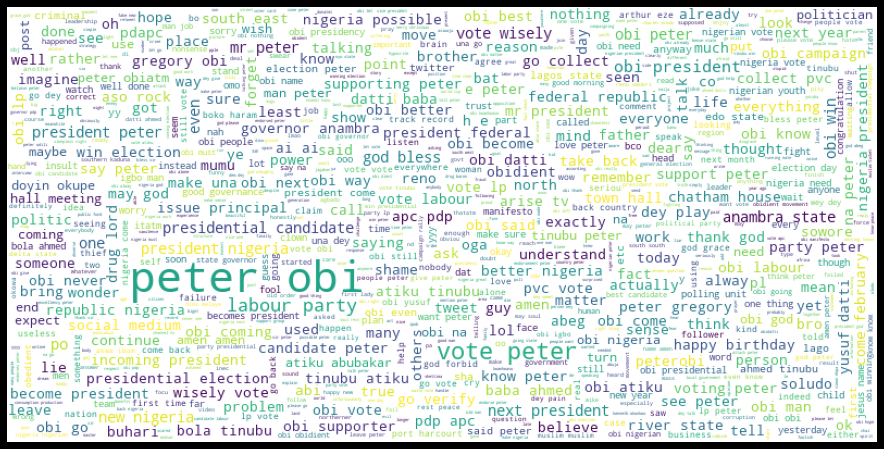

In [84]:
plt.tight_layout(pad=0)
plt.figure(figsize=(16,8),facecolor='k')
plt.imshow(obi_wordcloud)
plt.axis('off')

In [85]:
del obi_words, obi_wordcloud

In [86]:
gc.collect()

70708

In [87]:
atiku_words=[]
for tweet in df[atiku_tweets]['Tweet_cleaned']:
    atiku_words.append(tweet)
atiku_words=' '.join(atiku_words)


In [88]:
len(atiku_words)

97844784

(-0.5, 799.5, 399.5, -0.5)

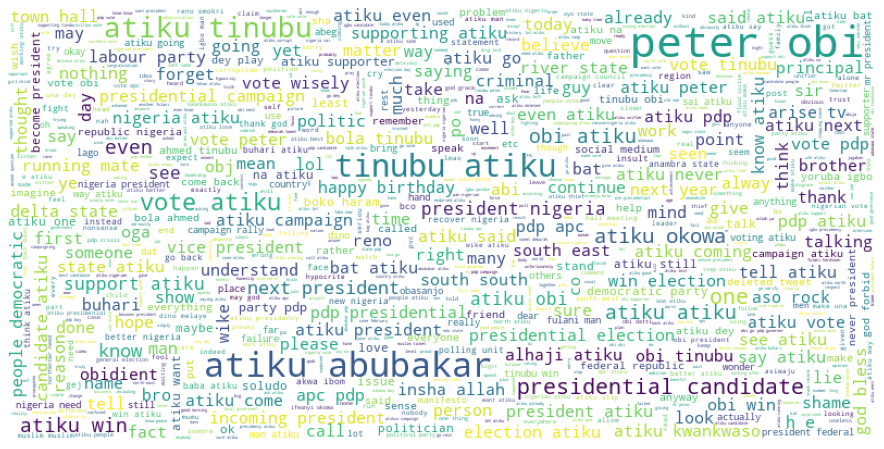

In [89]:
atiku_wordcloud= WordCloud().generate(atiku_words)
atiku_wordcloud = WordCloud(background_color="white", max_words=2000,
                      max_font_size=40, relative_scaling=.5,width=800,height=400).generate(atiku_words)

plt.figure(figsize=(16,8))
plt.tight_layout(pad=0)
plt.imshow(atiku_wordcloud)
plt.axis('off')

In [90]:
del atiku_words, atiku_wordcloud
gc.collect()

3189

In [91]:
tinubu_words=[]
for tweet in df[tinubu_tweets]['Tweet_cleaned']:
    tinubu_words.append(tweet)
tinubu_words=' '.join(tinubu_words)


In [92]:
len(tinubu_words)

120966746

(-0.5, 799.5, 399.5, -0.5)

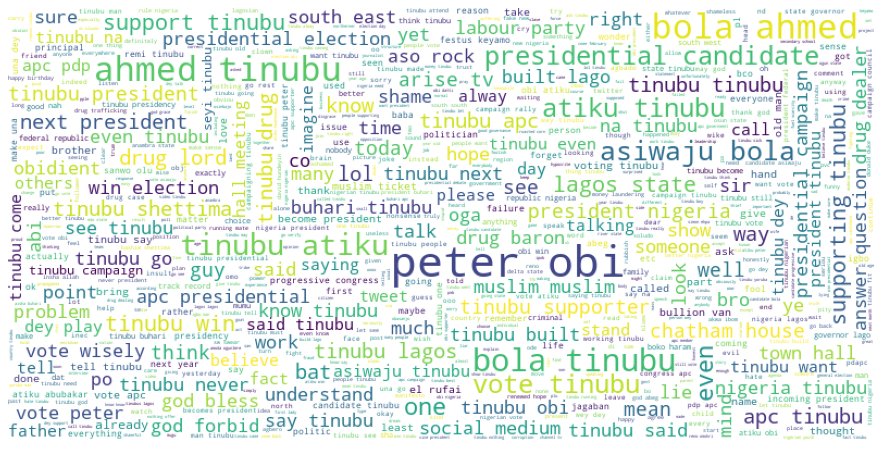

In [93]:
tinubu_wordcloud= WordCloud().generate(tinubu_words)
tinubu_wordcloud = WordCloud(background_color="white", max_words=2000,
                      max_font_size=40, relative_scaling=.5,width=800,height=400).generate(tinubu_words)

plt.figure(figsize=(16,8))
plt.tight_layout(pad=0)
plt.imshow(tinubu_wordcloud)
plt.axis('off')

In [94]:
del tinubu_wordcloud, tinubu_words
gc.collect()

3189

In [95]:
# def get_sentiment(text):
#     sid = SentimentIntensityAnalyzer()
#     sentiment_dict=sid.polarity_scores(text)
#     return sentiment_dict['compound']

#### The version before this, the sentiments were predicted with vadar scores. The above code is the funtion used for the prediction. Since the data was really large the prediction took about 10 hours of runtime. The cell took over 90 percent of total runtime of the whole notebook

In [96]:
# %%time
# df['sentiment_score']=df['Tweet_cleaned'].apply(lambda x: get_sentiment(x))

In [97]:
df['Date Created']=pd.to_datetime(df['Date Created'])

In [98]:

df['year']=df['Date Created'].apply(lambda x: pd.to_datetime(x).year)
df['month']=df['Date Created'].apply(lambda x: pd.to_datetime(x).month)
df['day']=df['Date Created'].apply(lambda x: pd.to_datetime(x).day)


In [99]:
def score_dict(sentiment):
    sen=[]
    if sentiment > 0.05:
        sen.append('positive')
    elif sentiment < -0.05:
        sen.append('negative')
    else:
        sen.append('neutral')
    return sen[0]


In [100]:
# df_sentiment['sentiment']=df_sentiment['sentiment_score'].apply(lambda x: score_dict(x))

In [101]:
# df['sentiment']

In [102]:
# df.to_csv('cleaned_df.csv')

#### In the version prior to this the sentiment data was saved as cleaned_df.csv and a dataset was created from it

In [103]:
df_sentiment=pd.read_csv('../input/nigeria-election-tweets/cleaned_df.csv')

In [104]:
# df_sentiment.drop(columns=['Unnamed: 0'],inplace=True)

In [105]:
df_sentiment['sentiment']=df_sentiment['sentiment_score'].apply(lambda x: score_dict(x))

In [106]:
df_sentiment['sentiment']

0           neutral
1          positive
2          negative
3           neutral
4           neutral
             ...   
4551297    positive
4551298    positive
4551299    positive
4551300    positive
4551301     neutral
Name: sentiment, Length: 4551302, dtype: object

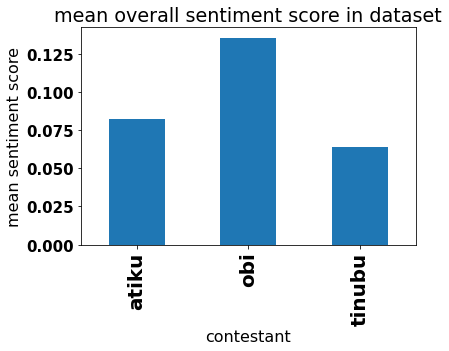

In [107]:
df_sentiment.groupby('contestant')['sentiment_score'].mean().plot(kind='bar');
plt.ylabel('mean sentiment score');
plt.title('mean overall sentiment score in dataset');

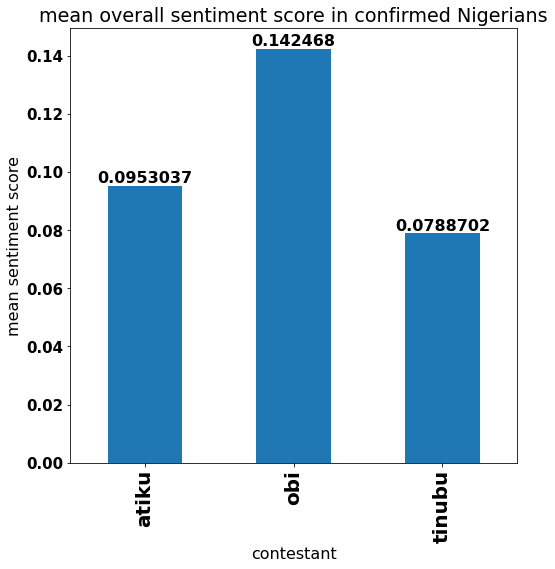

In [108]:
plt.figure(figsize=(8,8))
ax=df_sentiment[df_sentiment['country'].isna()==False].groupby('contestant')['sentiment_score'].mean().plot(kind='bar');
plt.ylabel('mean sentiment score');
plt.title('mean overall sentiment score in confirmed Nigerians');
for i in ax.containers:
    ax.bar_label(i,)

In [109]:
not_null_country=df_sentiment[df_sentiment['country'].isna()==False]

In [110]:
not_null_country

Date Created  \
2        2023-01-29 23:59:26+00:00   
3        2023-01-29 23:59:10+00:00   
8        2023-01-29 23:58:09+00:00   
13       2023-01-29 23:56:53+00:00   
15       2023-01-29 23:56:34+00:00   
...                            ...   
4551287  2022-10-07 21:35:56+00:00   
4551288  2022-10-07 21:35:33+00:00   
4551293  2022-10-07 21:34:37+00:00   
4551300  2022-10-07 21:32:30+00:00   
4551301  2022-10-07 21:32:20+00:00   

                                                     Tweet  \
2        @Indigo51603150 @okesigo_ @solakafinta @PeterO...   
3        @ketoolarewaju1 @solakafinta @PeterObi @Jack_n...   
8        @Ohiss_ @PeterObi Even yahoo apprentice won us...   
13                               @Naija_Activist Peter Obi   
15       @bellotom07 @MooreEhis @nonyeagudozie @_greatd...   
...                                                    ...   
4551287  @realFFK Peter Obi have become a nightmare to ...   
4551288  @DrOlusesan the only people obidients want to ...   
4551293  @atiku And you were not bothered or concern wi...   
4551300  Wish I don't have to say this about Atiku/Tinu...   
4551301  Court fixes date on Suit seeking to Disqualify...   

                                             Tweet_cleaned contestant   state  \
2        opening dirty mouth..what done opening mouth s...        obi   Lagos   
3                                                      get        obi    Kano   
8            even yahoo apprentice use obidatti trend well        obi           
13                                               peter obi        obi   Lagos   
15           next accusation pls pls make reasonable cheer        obi   Lagos   
...                                                    ...        ...     ...   
4551287  peter obi become nightmare apc atiku believe g...      atiku  Rivers   
4551288        people obidients want beat tinibu atiku pvc      atiku           
4551293  bothered concern murder deborah would even del...      atiku           
4551300  wish say atiku/tinubu future nigeria must get ...      atiku           
4551301  court fix date suit seeking disqualify atiku t...      atiku   Delta   

         country combo_contestant  sentiment_score  year  month  day sentiment  
2        Nigeria              obi          -0.4404  2023      1   29  negative  
3        Nigeria              obi           0.0000  2023      1   29   neutral  
8        Nigeria              obi           0.2732  2023      1   29  positive  
13       Nigeria              obi           0.0000  2023      1   29   neutral  
15       Nigeria              obi           0.4404  2023      1   29  positive  
...          ...              ...              ...   ...    ...  ...       ...  
4551287  Nigeria        atiku obi          -0.5106  2022     10    7  negative  
4551288  Nigeria            atiku           0.0772  2022     10    7  positive  
4551293  Nigeria            atiku          -0.8625  2022     10    7  negative  
4551300  Nigeria     atiku tinubu           0.4019  2022     10    7  positive  
4551301  Nigeria     atiku tinubu           0.0000  2022     10    7   neutral  

[1986955 rows x 12 columns]

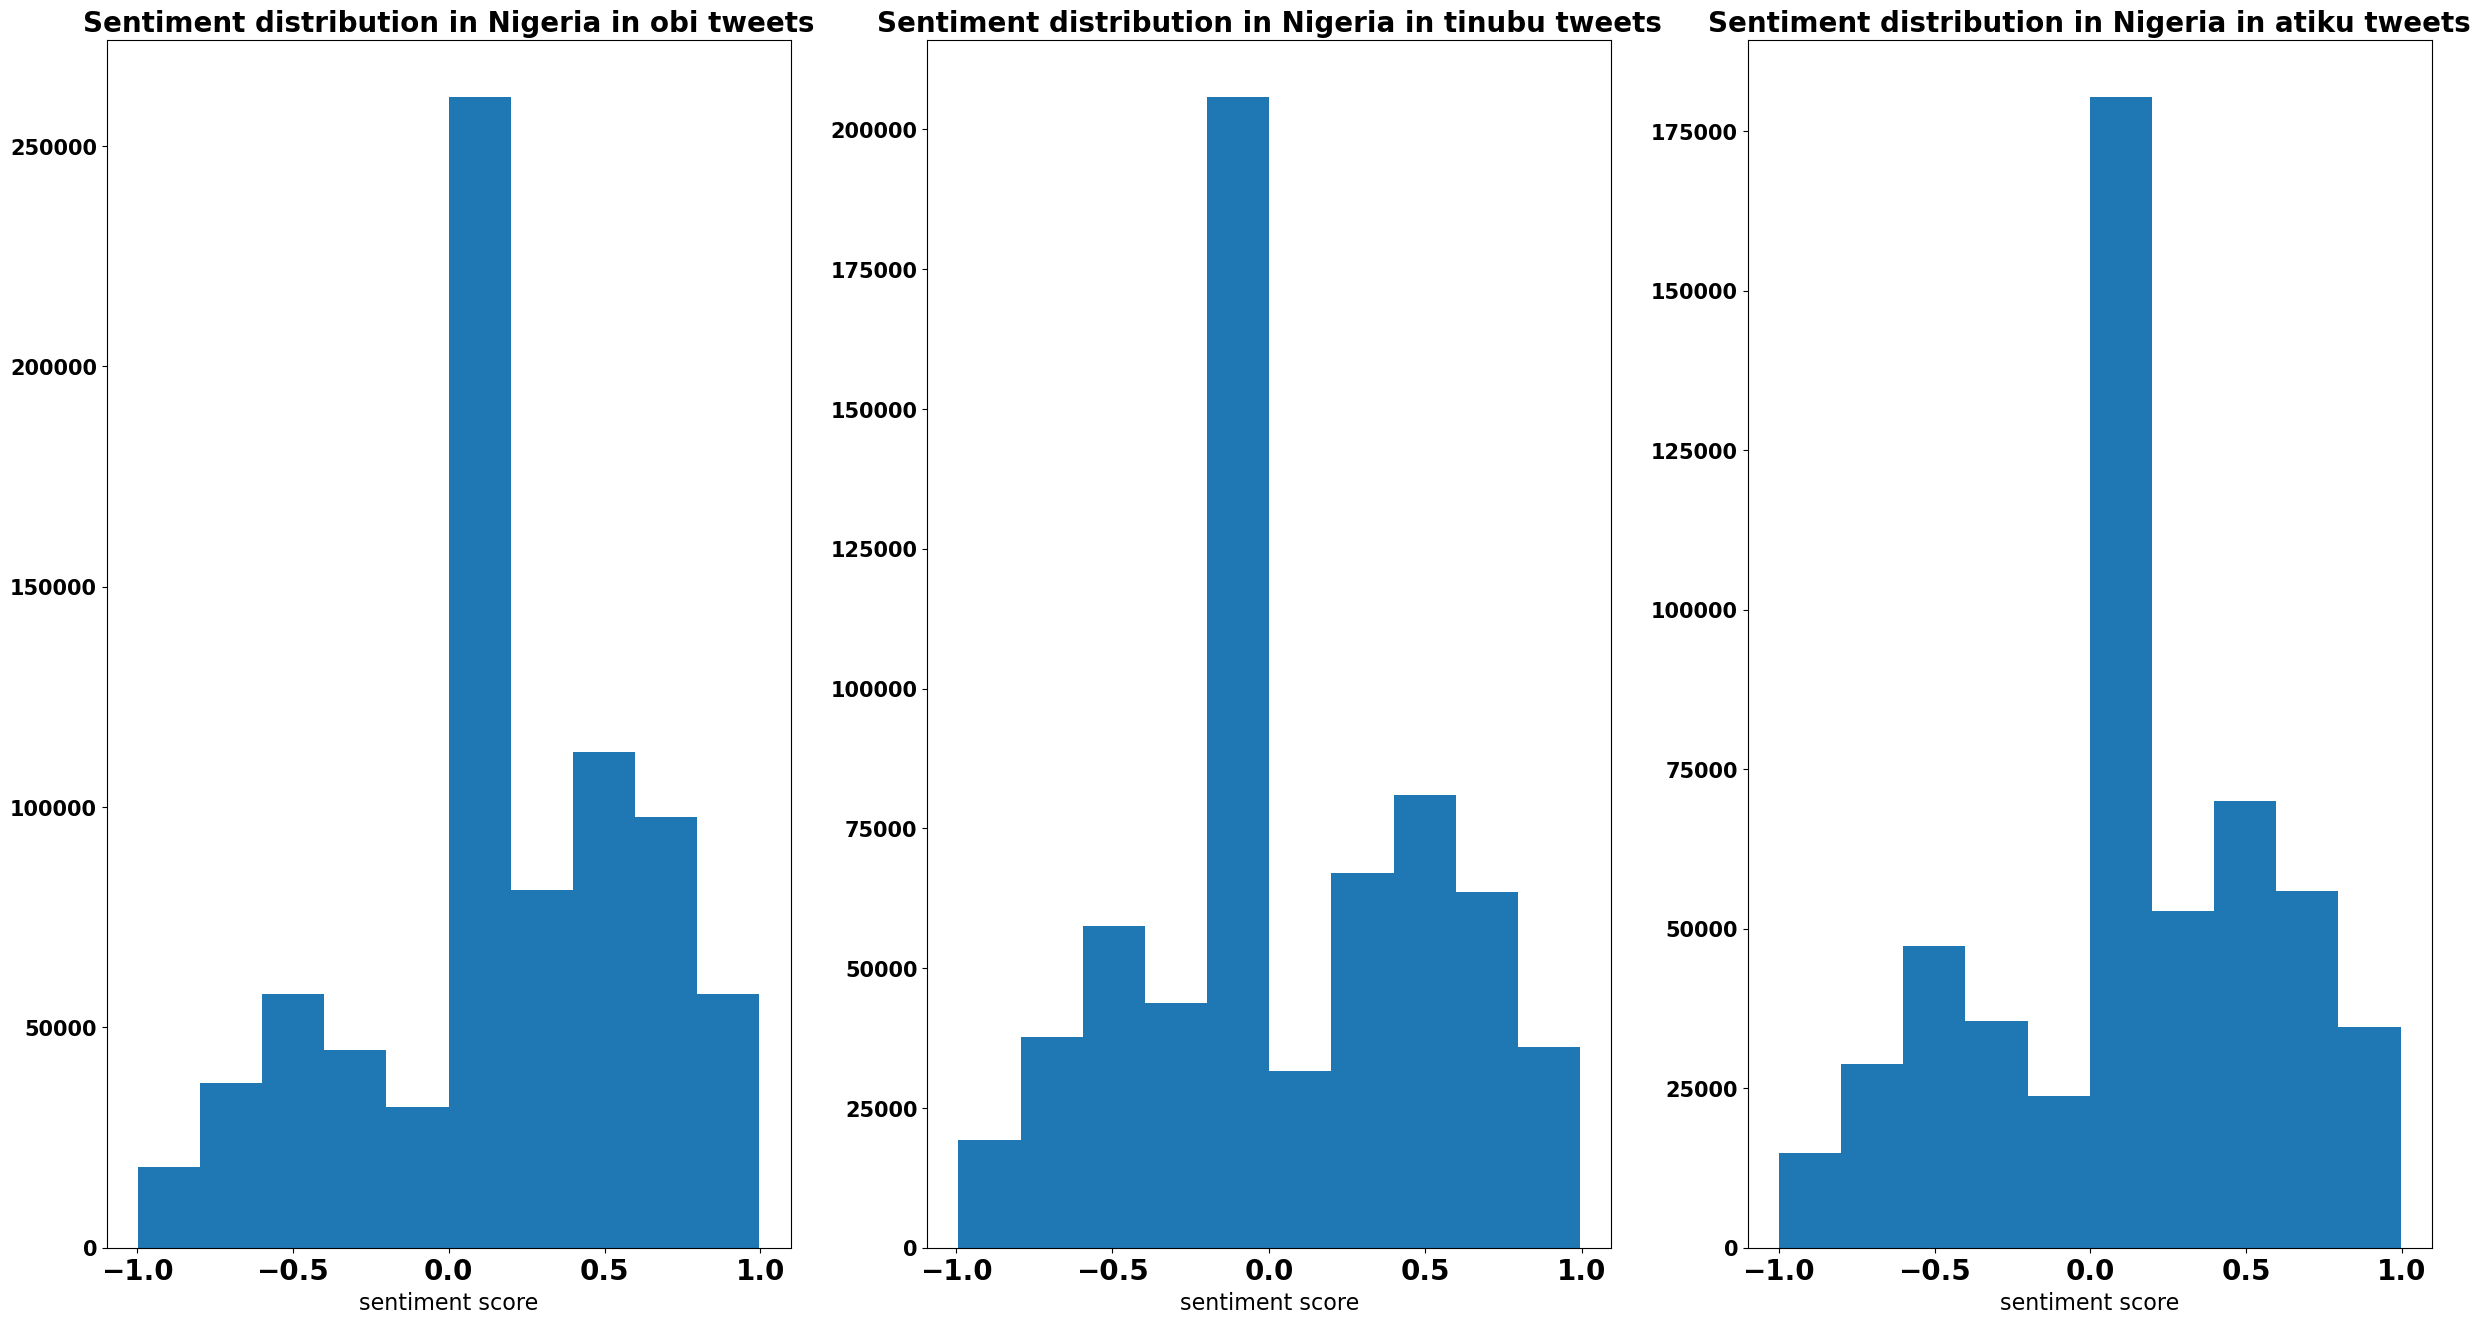

In [111]:
fig,axes=plt.subplots(ncols=3,nrows=1, figsize=(30,16),dpi=100)
axes[0].hist(not_null_country[not_null_country['contestant']=='obi'] ['sentiment_score'], );
axes[1].hist(not_null_country[not_null_country['contestant']=='tinubu'] ['sentiment_score'],);
axes[2].hist(not_null_country[not_null_country['contestant']=='atiku'] ['sentiment_score']);
for i in range(3):
    axes[i].set_xlabel('sentiment score')
    axes[i].set_ylabel('')
axes[0].set_title('Sentiment distribution in Nigeria in obi tweets', fontsize=20,fontweight='bold')
axes[1].set_title('Sentiment distribution in Nigeria in tinubu tweets', fontsize=20,fontweight='bold')
axes[2].set_title('Sentiment distribution in Nigeria in atiku tweets', fontsize=20,fontweight='bold');

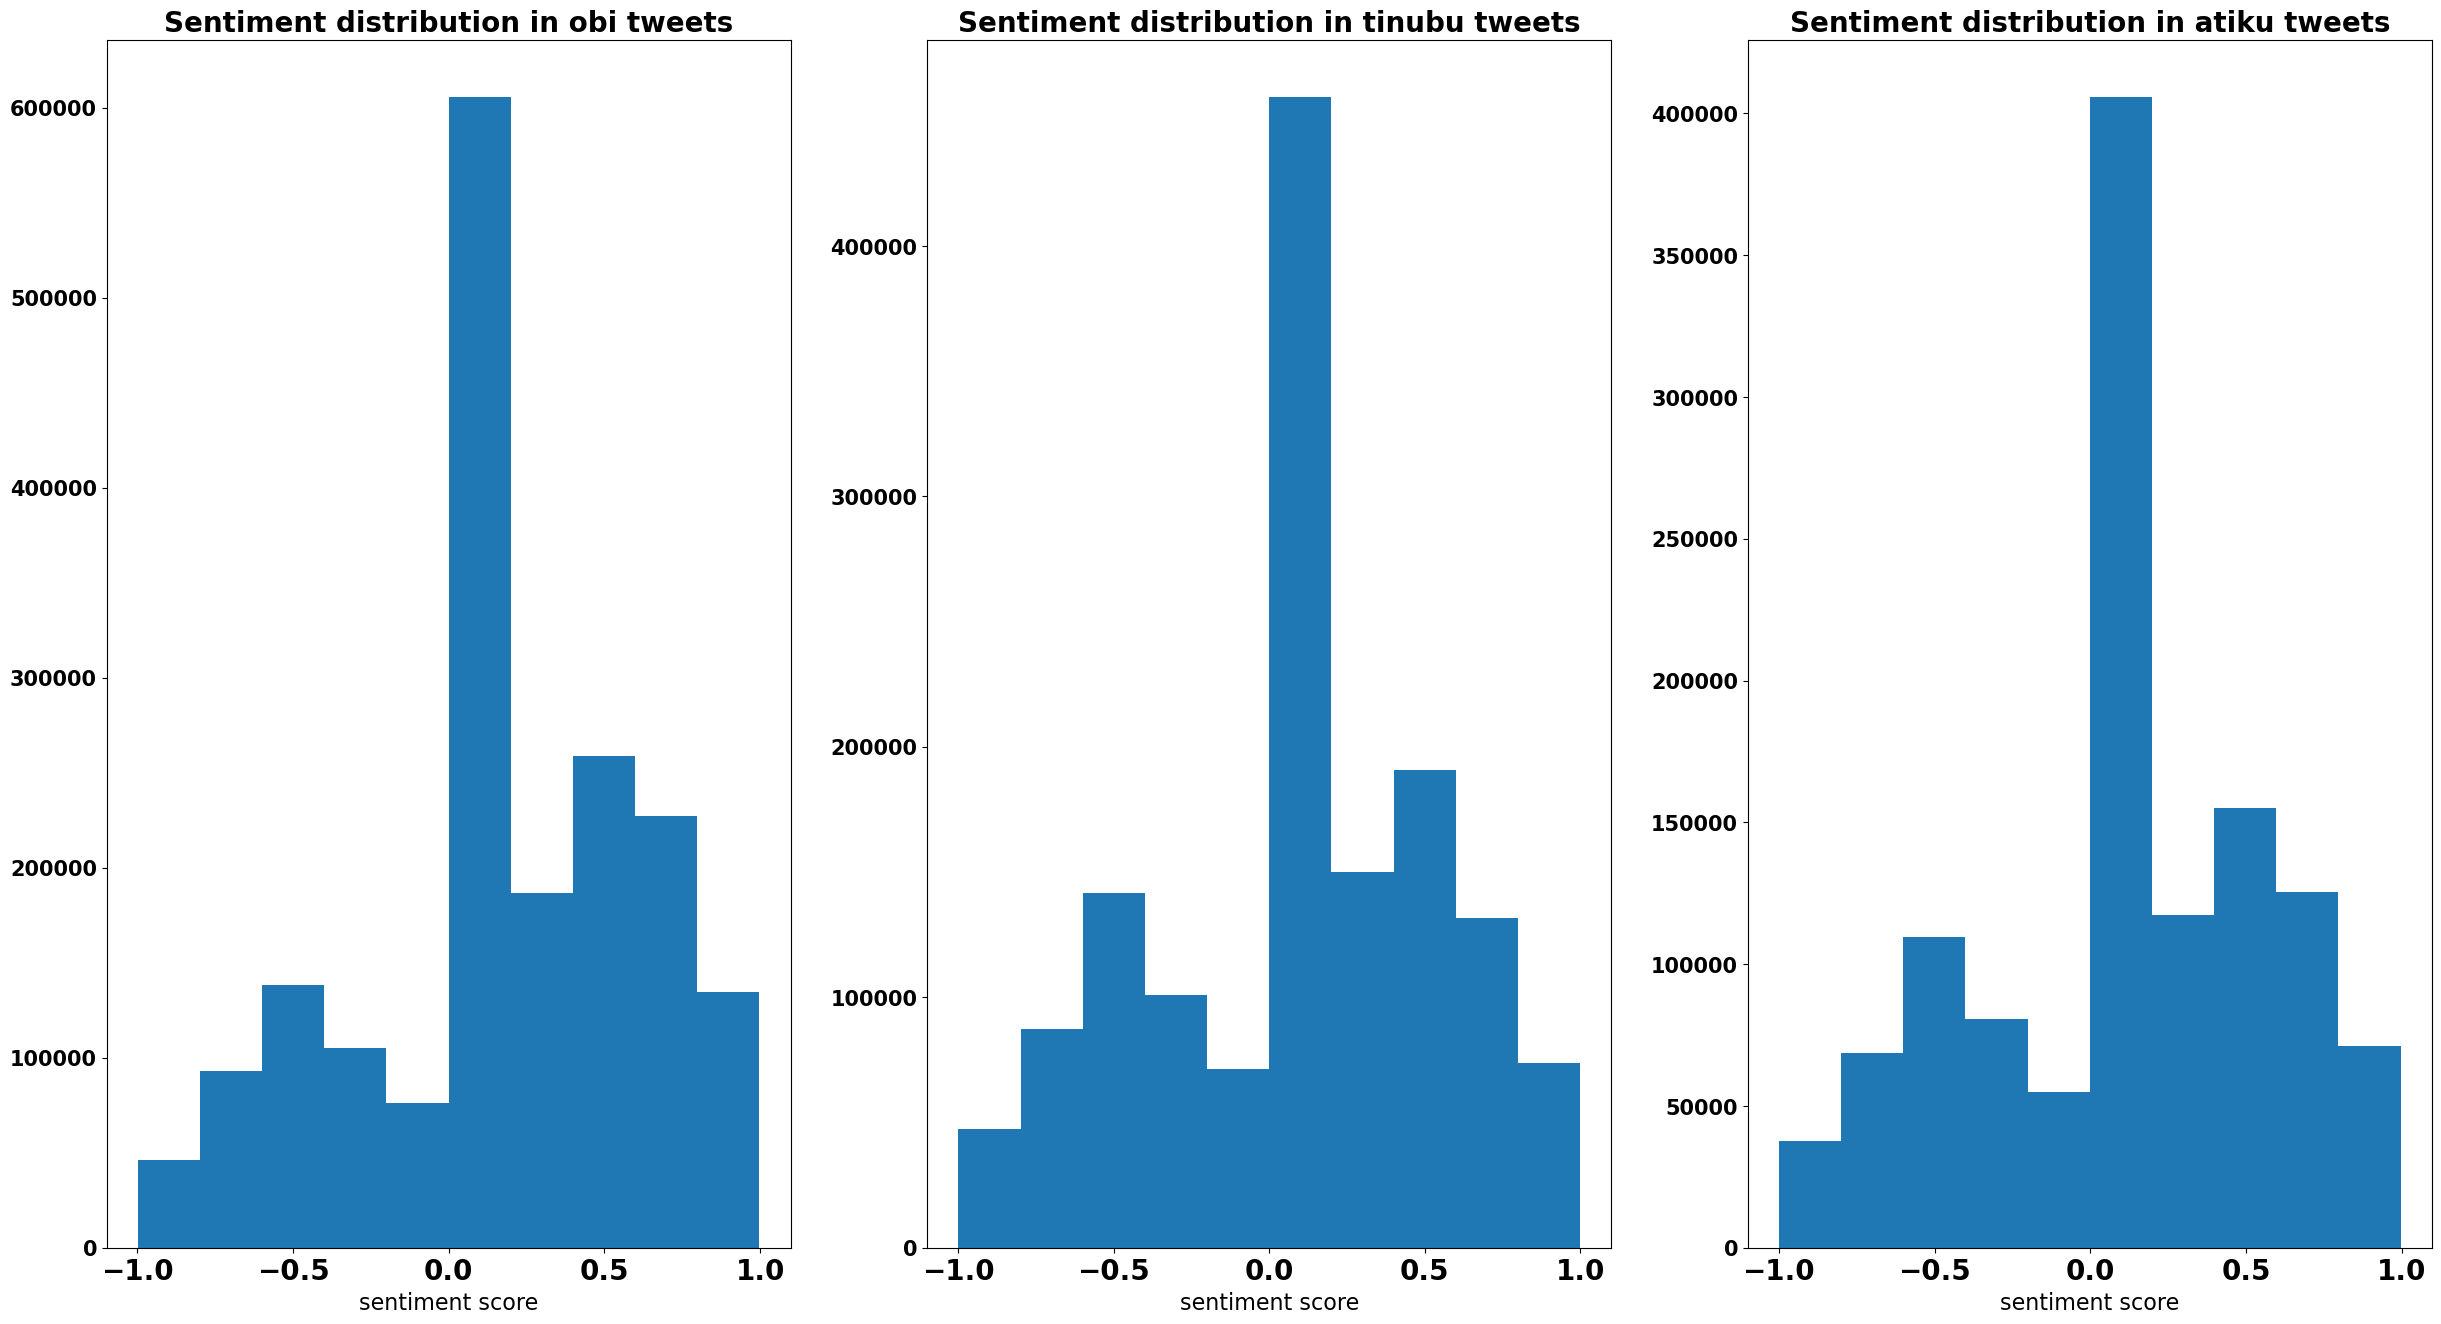

In [112]:
fig,axes=plt.subplots(ncols=3,nrows=1, figsize=(30,16),dpi=100)
axes[0].hist(df_sentiment[df_sentiment['contestant']=='obi'] ['sentiment_score'], );
axes[1].hist(df_sentiment[df_sentiment['contestant']=='tinubu'] ['sentiment_score'],);
axes[2].hist(df_sentiment[df_sentiment['contestant']=='atiku'] ['sentiment_score']);
for i in range(3):
    axes[i].set_xlabel('sentiment score')
    axes[i].set_ylabel('')
axes[0].set_title('Sentiment distribution in obi tweets', fontsize=20,fontweight='bold')
axes[1].set_title('Sentiment distribution in tinubu tweets', fontsize=20,fontweight='bold')
axes[2].set_title('Sentiment distribution in atiku tweets', fontsize=20,fontweight='bold');
plt.show()

#### The culmination of the above sentiment data showed that overall obi had the highest sentiment score followed by atiku and then Tinubu. The histogram data shwed that tinubu's sentiment distribution had a higher negative range than the other two hence the reason for the lower sentiment score. The differences between the sentiment score of the candidates were marginal at best and a foundation for prediction cannot be based on the sentiment scores of the candidates. Analysis conducted with repect to states and analysis of sentiments in the last 30 days are in the tableau link below.
[Tableau Visualisation link showing sentiments by states in Nigeria](https://public.tableau.com/views/SentimentanalysistopredictNigerianpresidentialelectionusingtweets/MapDashboard?:language=en-US&:display_count=n&:origin=viz_share_link)

In [113]:
df_sentiment

Date Created  \
0        2023-01-29 23:59:34+00:00   
1        2023-01-29 23:59:27+00:00   
2        2023-01-29 23:59:26+00:00   
3        2023-01-29 23:59:10+00:00   
4        2023-01-29 23:58:56+00:00   
...                            ...   
4551297  2022-10-07 21:33:04+00:00   
4551298  2022-10-07 21:32:45+00:00   
4551299  2022-10-07 21:32:40+00:00   
4551300  2022-10-07 21:32:30+00:00   
4551301  2022-10-07 21:32:20+00:00   

                                                     Tweet  \
0        Did you know that Peter Obi lived with the cur...   
1        @Ohiss_ @PeterObi He will, by God's Grace. But...   
2        @Indigo51603150 @okesigo_ @solakafinta @PeterO...   
3        @ketoolarewaju1 @solakafinta @PeterObi @Jack_n...   
4        It seems the best content for some people now ...   
...                                                    ...   
4551297  2023, we’ve all agreed to retire Tinubu and At...   
4551298  @renoomokri You are running away from Nigeria ...   
4551299   @icee_queeen @fkeyamo No it was Atiku fine girl.   
4551300  Wish I don't have to say this about Atiku/Tinu...   
4551301  Court fixes date on Suit seeking to Disqualify...   

                                             Tweet_cleaned contestant  state  \
0        know peter obi lived current sultan sokoto stu...        obi          
1        god's grace well also nigerian presume tweetin...        obi          
2        opening dirty mouth..what done opening mouth s...        obi  Lagos   
3                                                      get        obi   Kano   
4        seems best content people ethnic bigotry even ...        obi          
...                                                    ...        ...    ...   
4551297            agreed retire tinubu atiku may god help      atiku          
4551298  running away nigeria since almost reason suppo...      atiku          
4551299                                    atiku fine girl      atiku          
4551300  wish say atiku/tinubu future nigeria must get ...      atiku          
4551301  court fix date suit seeking disqualify atiku t...      atiku  Delta   

         country combo_contestant  sentiment_score  year  month  day sentiment  
0            NaN              obi           0.0000  2023      1   29   neutral  
1            NaN              obi           0.9022  2023      1   29  positive  
2        Nigeria              obi          -0.4404  2023      1   29  negative  
3        Nigeria              obi           0.0000  2023      1   29   neutral  
4            NaN              obi          -0.0240  2023      1   29   neutral  
...          ...              ...              ...   ...    ...  ...       ...  
4551297      NaN     atiku tinubu           0.7096  2022     10    7  positive  
4551298      NaN            atiku           0.4627  2022     10    7  positive  
4551299      NaN            atiku           0.2023  2022     10    7  positive  
4551300  Nigeria     atiku tinubu           0.4019  2022     10    7  positive  
4551301  Nigeria     atiku tinubu           0.0000  2022     10    7   neutral  

[4551302 rows x 12 columns]

In [114]:
df_list=['contestant','state','country','combo_contestant','sentiment_score','year','month','day','sentiment']
df_state=df_sentiment[df_list]

In [115]:
df_state.to_csv('df_state.csv',index=False)

In [116]:
df_state

contestant  state  country combo_contestant  sentiment_score  year  \
0              obi             NaN              obi           0.0000  2023   
1              obi             NaN              obi           0.9022  2023   
2              obi  Lagos  Nigeria              obi          -0.4404  2023   
3              obi   Kano  Nigeria              obi           0.0000  2023   
4              obi             NaN              obi          -0.0240  2023   
...            ...    ...      ...              ...              ...   ...   
4551297      atiku             NaN     atiku tinubu           0.7096  2022   
4551298      atiku             NaN            atiku           0.4627  2022   
4551299      atiku             NaN            atiku           0.2023  2022   
4551300      atiku         Nigeria     atiku tinubu           0.4019  2022   
4551301      atiku  Delta  Nigeria     atiku tinubu           0.0000  2022   

         month  day sentiment  
0            1   29   neutral  
1            1   29  positive  
2            1   29  negative  
3            1   29   neutral  
4            1   29   neutral  
...        ...  ...       ...  
4551297     10    7  positive  
4551298     10    7  positive  
4551299     10    7  positive  
4551300     10    7  positive  
4551301     10    7   neutral  

[4551302 rows x 9 columns]

In [117]:
df_sentiment.to_csv('cleaned_df.csv',index=False)